In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import re


In [2]:
# Adjust display options to show full content
pd.set_option('display.max_colwidth', None)  # No truncation for column content
pd.set_option('display.max_rows', None)      # Display all rows (set a limit if data is large)
pd.set_option('display.max_columns', None)   # Display all columns

In [3]:
df_CombinedData = pd.read_csv(r'DataSets\New_Structured_Data\Combined_Cars_Data.csv',low_memory=False)
df_CombinedData.head(10)

,city,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,imgUrl,heading,desc,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Features,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication,Mileage,Engine,Max Power,Torque,Seats.1,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,NaN,NaN,NaN,https://stimg.cardekho.com/used-cars/common/icons/trending.svg,Trending Car!,High chances of sale in next 6 days,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0,8,10.0,7.0,5.0,13.0,NaN,23.1 kmpl,998 CC,67.04bhp@6000rpm,90Nm,5.0,White,K10B Engine,998.0,90Nm@3500rpm,3.0,4.0,DOHC,MPFi,73 X 82 mm,11.0:1,No,No,3715mm,1635mm,1565mm,2425mm,1420mm,1410mm,835kg,1250kg,5 Speed,FWD,5.0,Power,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,NaN,NaN,NaN,https://stimg.cardekho.com/used-cars/common/icons/trending.svg,Trending Car!,High chances of sale in next 6 days,Feb 2018,Comprehensive,Petrol,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,Manual,2018.0,9,17.0,12.0,12.0,27.0,9.0,17 kmpl,1497 CC,121.31bhp@6500rpm,150Nm,5.0,White,Ti-VCT Petrol Engine,1497.0,150Nm@4500rpm,3.0,4.0,DOHC,Direct Injection,79 X 76.5 mm,11.0:1,No,No,3998mm,1765mm,1647mm,2519mm,NaN,NaN,1242Kg,1660Kg,5 Speed,FWD,5.0,Power,5.3 metres,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,NaN,NaN,NaN,https://stimg.cardekho.com/used-cars/common/icons/trending.svg,Trending Car!,High chances of sale in next 6 days,Sept 2018,Comprehensive,Petrol,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,Manual,2018.0,9,14.0,12.0,13.0,24.0,8.0,23.84 kmpl,1199 CC,84bhp@6000rpm,114Nm,5.0,Red,Revotron Engine,1199.0,114Nm@3500rpm,3.0,4.0,DOHC,MPFi,77 X 85.8 mm,10.8:1,No,No,3746mm,1647mm,1535mm,2400mm,1400mm,1420mm,1012kg,NaN,5 Speed,FWD,5.0,Power,4.9 meters,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,NaN,NaN,NaN,https://stimg.cardekho.com/used-cars/common/icons/trending.svg,Trending Car!,High chances of sale in next 6 days,Dec 2014,Comprehensive,Petrol,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,Manual,2014.0,9,16.0,10.0,10.0,18.0,7.0,19.1 kmpl,1197 CC,81.86bhp@6000rpm,113.75Nm,5.0,Others,Kappa VTVT Petrol Engine,1197.0,113.75Nm@4000rpm,4.0,4.0,DOHC,Direct Injection,NaN,NaN,No,No,3995mm,1660mm,1520mm,2425mm,1479mm,1493mm,1180,NaN,5 Speed,FWD,5.0,Power,4.7 metres,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,NaN,NaN,NaN,https://stimg.cardekho.com/used-cars/common/icons/trending.svg,Trending Car!,High chances of sale in next 6 days,2015,Third Party insurance,Diesel,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,Manual,2015.0,9,21.0,11.0,13.0,22.0,8.0,23.65 kmpl,1248 CC,88.5bhp@4000rpm,200Nm,5.0,Gray,DDiS 200 Diesel Engine,1248.0,200Nm@1750rpm,4.0,4.0,DOHC,NaN,69.6 x 82 mm,NaN,Yes,No,4300mm,

In [4]:
df_CombinedData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8369 non-null   object 
 1   it                             8369 non-null   int64  
 2   ft                             8369 non-null   object 
 3   bt                             8365 non-null   object 
 4   km                             8369 non-null   object 
 5   transmission                   8369 non-null   object 
 6   ownerNo                        8369 non-null   int64  
 7   owner                          8369 non-null   object 
 8   oem                            8369 non-null   object 
 9   model                          8369 non-null   object 
 10  modelYear                      8369 non-null   int64  
 11  centralVariantId               8369 non-null   int64  
 12  variantName                    8369 non-null   o

In [5]:
df_CombinedData.columns

Index(['city', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'imgUrl', 'heading',
       'desc', 'Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats',
       'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Features', 'Comfort & Convenience', 'Interior',
       'Exterior', 'Safety', 'Entertainment & Communication', 'Mileage',
       'Engine', 'Max Power', 'Torque', 'Seats.1', 'Color', 'Engine Type',
       'Displacement', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Stee

In [6]:
# Dropping Columns based on the Nullvalues,uniquesvalues, unwanted data,repeated column .

In [7]:
df_CombinedData.drop(columns=['it','priceActual','priceSaving','priceFixedText','imgUrl','heading','desc','Max Torque'],inplace=True,axis = 1)

In [8]:
df_CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8369 non-null   object 
 1   ft                             8369 non-null   object 
 2   bt                             8365 non-null   object 
 3   km                             8369 non-null   object 
 4   transmission                   8369 non-null   object 
 5   ownerNo                        8369 non-null   int64  
 6   owner                          8369 non-null   object 
 7   oem                            8369 non-null   object 
 8   model                          8369 non-null   object 
 9   modelYear                      8369 non-null   int64  
 10  centralVariantId               8369 non-null   int64  
 11  variantName                    8369 non-null   object 
 12  price                          8369 non-null   o

In [9]:
#Checking the Datas of the column1 and column2 are same or Not, for Deleting the column .
# If both are same ,you can choose either one column. 

In [10]:
def RowData_Checking(column1, column2):
    if df_CombinedData[column1].all() == df_CombinedData[column2].all():
        return f'All the datas are same in {column1} and {column2}'
    else:
        return f'Datas are different in {column1} and {column2}'

In [11]:
val1 = RowData_Checking('transmission', 'Transmission')
print(val1)
print('-----------------------------')

val2 = RowData_Checking('ft', 'Fuel Type')
print(val2)
print('-----------------------------')

val3 = RowData_Checking('Wheel Size','Alloy Wheel Size')
print(val3)
print('-----------------------------')

All the datas are same in transmission and Transmission
-----------------------------
All the datas are same in ft and Fuel Type
-----------------------------
All the datas are same in Wheel Size and Alloy Wheel Size
-----------------------------


In [12]:
# Checking the Percentage of the non null values in each columns

In [13]:
def PercentageOf_Data(Column):
    PercentOf_NonNull = ((df_CombinedData[Column].shape[0] - df_CombinedData[Column].isna().sum()) / df_CombinedData[Column].shape[0]) * 100
    if PercentOf_NonNull > 50 :
        return f'Percentage of non null values of {Column} is above 50% , which is \033[92m{PercentOf_NonNull:.2f}%\033[0m.'
    else :
        return f'Percentage of non null values of {Column} is below or equal to 50% , which is \033[91m{PercentOf_NonNull:.2f}%\033[0m.'

In [14]:
for col in df_CombinedData.columns:
    col1 = PercentageOf_Data(col)
    print(col1)
    print("------------------------")

Percentage of non null values of city is above 50% , which is 100.00%.
------------------------
Percentage of non null values of ft is above 50% , which is 100.00%.
------------------------
Percentage of non null values of bt is above 50% , which is 99.95%.
------------------------
Percentage of non null values of km is above 50% , which is 100.00%.
------------------------
Percentage of non null values of transmission is above 50% , which is 100.00%.
------------------------
Percentage of non null values of ownerNo is above 50% , which is 100.00%.
------------------------
Percentage of non null values of owner is above 50% , which is 100.00%.
------------------------
Percentage of non null values of oem is above 50% , which is 100.00%.
------------------------
Percentage of non null values of model is above 50% , which is 100.00%.
------------------------
Percentage of non null values of modelYear is above 50% , which is 100.00%.
------------------------
Percentage of non null values 

In [15]:
# Based on the analysis conducted on each column, a decision was made to delete the selected columns.

In [16]:
df_CombinedData.drop(columns=['Kms Driven','Ownership','owner','Year of Manufacture','Engine Displacement',
                              'Engine','Seats.1','Seats','ft','Alloy Wheel Size','transmission','BoreX Stroke',
                              'Compression Ratio','Gross Weight','No Door Numbers','Ground Clearance Unladen'],inplace = True, axis = 1)

In [17]:
print(f'Total No. of columns: {df_CombinedData.shape[1]}' )

Total No. of columns: 52


In [18]:
df_CombinedData.head(5)

,city,bt,km,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,Registration Year,Insurance Validity,Fuel Type,RTO,Transmission,Features,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication,Mileage,Max Power,Torque,Color,Engine Type,Displacement,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Cargo Volumn,Wheel Size
0,Bangalore,Hatchback,"1,20,000",3,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,2015,Third Party insurance,Petrol,KA51,Manual,8,10.0,7.0,5.0,13.0,NaN,23.1 kmpl,67.04bhp@6000rpm,90Nm,White,K10B Engine,998.0,3.0,4.0,DOHC,MPFi,No,No,3715mm,1635mm,1565mm,2425mm,1420mm,1410mm,835kg,5 Speed,FWD,5.0,Power,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",235-litres,NaN
1,Bangalore,SUV,"32,706",2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,Comprehensive,Petrol,KA05,Manual,9,17.0,12.0,12.0,27.0,9.0,17 kmpl,121.31bhp@6500rpm,150Nm,White,Ti-VCT Petrol Engine,1497.0,3.0,4.0,DOHC,Direct Injection,No,No,3998mm,1765mm,1647mm,2519mm,NaN,NaN,1242Kg,5 Speed,FWD,5.0,Power,5.3 metres,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",352-litres,16
2,Bangalore,Hatchback,"11,949",1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,Comprehensive,Petrol,KA03,Manual,9,14.0,12.0,13.0,24.0,8.0,23.84 kmpl,84bhp@6000rpm,114Nm,Red,Revotron Engine,1199.0,3.0,4.0,DOHC,MPFi,No,No,3746mm,1647mm,1535mm,2400mm,1400mm,1420mm,1012kg,5 Speed,FWD,5.0,Power,4.9 meters,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,242-litres,14
3,Bangalore,Sedan,"17,794",1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,Comprehensive,Petrol,KA53,Manual,9,16.0,10.0,10.0,18.0,7.0,19.1 kmpl,81.86bhp@6000rpm,113.75Nm,Others,Kappa VTVT Petrol Engine,1197.0,4.0,4.0,DOHC,Direct Injection,No,No,3995mm,1660mm,1520mm,2425mm,1479mm,1493mm,1180,5 Speed,FWD,5.0,Power,4.7 metres,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",407-litres,14
4,Bangalore,SUV,"60,000",1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,2015,Third Party insurance,Diesel,KA04,Manual,9,21.0,11.0,13.0,22.0,8.0,23.65 kmpl,88.5bhp@4000rpm,200Nm,Gray,DDiS 200 Diesel Engine,1248.0,4.0,4.0,DOHC,NaN,Yes,No,4300mm,1785mm,1595mm,2600mm,NaN,NaN,1230Kg,5 Speed,FWD,5.0,Power,5.2 meters,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",353-litres,16


In [19]:
df_CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8369 non-null   object 
 1   bt                             8365 non-null   object 
 2   km                             8369 non-null   object 
 3   ownerNo                        8369 non-null   int64  
 4   oem                            8369 non-null   object 
 5   model                          8369 non-null   object 
 6   modelYear                      8369 non-null   int64  
 7   centralVariantId               8369 non-null   int64  
 8   variantName                    8369 non-null   object 
 9   price                          8369 non-null   object 
 10  Registration Year              8317 non-null   object 
 11  Insurance Validity             8365 non-null   object 
 12  Fuel Type                      8369 non-null   o

# Formatting And Converting the Columns

In [20]:
def convert_to_numeric(column):
    
    def extract_number(value):
        if pd.isna(value):
            return value  # Keep NaN as is
        try:
            # Handle 'Lakh' and remove monetary symbols
            value = str(value).replace('₹', '').replace('Lakh', '00000').strip()
            # Extract numeric part using regex
            match = re.search(r'-?\d+(\.\d+)?', value.replace(',', ''))
            if match:
                return float(match.group())
            else:
                return np.nan
        except ValueError:
            return value  # Return NaN if conversion fails

    return column.apply(extract_number)

In [21]:
#Formatting and Converting the km Column
df_CombinedData['km'] = convert_to_numeric(df_CombinedData['km'])
df_CombinedData['km'].astype(int)

0        120000
1         32706
2         11949
3         17794
4         60000
5         20000
6         37772
7         30000
8         37000
9         11949
10        50000
11        24887
12        23000
13        48928
14       108862
15        80000
16        16000
17        65376
18        10000
19        67000
20       100000
21        18083
22        30000
23        57634
24        50000
25       110000
26        23447
27        30000
28        33000
29        87667
30        40000
31        79012
32        31344
33        50000
34        12434
35        60000
36        12000
37        40987
38        18157
39       120000
40        40000
41        89667
42       120000
43        56997
44       120000
45        59000
46        18835
47       120000
48        40000
49        60932
50        33539
51        66837
52          400
53        60000
54        44285
55       100000
56        25000
57        36735
58        79000
59       120000
60        10000
61        53645
62      

In [22]:
#Formatting and Converting the Price Column 
df_CombinedData['price'] = convert_to_numeric(df_CombinedData['price']) * 100000
df_CombinedData['price'].astype(int)

0           400000
1           811000
2           585000
3           462000
4           790000
5          1900000
6           345000
7          1200000
8           960000
9           585000
10          690000
11          682000
12          825000
13          595000
14          690000
15         1350000
16         5595000
17          521000
18         1005000
19          775000
20         2200000
21          582000
22         1090000
23          457000
24         4900000
25          550000
26          570000
27          220000
28         4145000
29          861000
30         1785000
31          802999
32         2565000
33          674000
34          349000
35         1050000
36         4425000
37          405999
38         4965000
39         1100000
40         1100000
41          594000
42          710000
43          692000
44          650000
45         2089999
46          411000
47          650000
48         3675000
49          610000
50         1675000
51          530000
52         7

In [23]:
#Formatting and Converting the Mileage Column 
df_CombinedData['Mileage'] = convert_to_numeric(df_CombinedData['Mileage'])
df_CombinedData['Mileage']

0        23.100
1        17.000
2        23.840
3        19.100
4        23.650
5        17.100
6        20.630
7        18.150
8        20.280
9        23.840
10       21.400
11       18.900
12       18.200
13       23.840
14       15.100
15       17.100
16          NaN
17       21.270
18       17.330
19       17.800
20       18.480
21       22.380
22       16.420
23       23.840
24        7.810
25       17.400
26       20.300
27       13.450
28       15.000
29       15.100
30       17.110
31       15.100
32       17.100
33       20.140
34       20.510
35       19.340
36       12.600
37       20.510
38       15.560
39       11.500
40       19.870
41       18.600
42       22.540
43       21.400
44       16.300
45       18.530
46       22.050
47       12.050
48       17.330
49       23.840
50       16.500
51       23.840
52          NaN
53       19.700
54       18.600
55       11.300
56       14.080
57       18.900
58       12.070
59       12.050
60       22.000
61       21.500
62      

In [24]:
#Formatting and Converting the Max Power Column
df_CombinedData['Max Power'] = convert_to_numeric( df_CombinedData['Max Power'] )
df_CombinedData['Max Power']

0        67.040
1       121.310
2        84.000
3        81.860
4        88.500
5       170.000
6        67.000
7       118.350
8       103.250
9        84.000
10       83.100
11       81.860
12       88.700
13       83.830
14      140.000
15      170.000
16      187.740
17       88.760
18      118.350
19      117.300
20      177.000
21       88.500
22      104.550
23       84.000
24      453.260
25      117.300
26       68.000
27       62.100
28      194.400
29      140.000
30      174.330
31      140.000
32      167.670
33       81.860
34       67.040
35      103.000
36      194.000
37       67.040
38      248.080
39      171.000
40      108.500
41       81.830
42       88.730
43       83.100
44      147.500
45      187.740
46       47.330
47      120.000
48      189.080
49       83.830
50      138.080
51       84.000
52      281.610
53       46.300
54       81.860
55      254.800
56      167.670
57       81.860
58      241.400
59      120.000
60       67.000
61      108.500
62      

In [25]:
#Formatting and Converting the Torque Column
df_CombinedData['Torque'] = convert_to_numeric( df_CombinedData['Torque'] )
df_CombinedData['Torque']

0        90.00
1       150.00
2       114.00
3       113.75
4       200.00
5       350.00
6       104.00
7       171.60
8       138.00
9       114.00
10      115.00
11      113.75
12      110.00
13      114.00
14      330.00
15      350.00
16      400.00
17      219.60
18      170.00
19      145.00
20       35.70
21      113.00
22      142.00
23      114.00
24      700.00
25      145.00
26       99.00
27       96.10
28      300.00
29      330.00
30      380.00
31      330.00
32      350.00
33      113.75
34       90.00
35      138.00
36      400.00
37       90.00
38      350.00
39      343.00
40      245.00
41      114.70
42      219.70
43      115.00
44      177.50
45      400.00
46       69.00
47      290.00
48      280.00
49      114.00
50      242.00
51      114.00
52      600.00
53       62.00
54      117.00
55      619.00
56      350.00
57      113.75
58      550.00
59      290.00
60       91.00
61      260.00
62      115.00
63       89.00
64      250.00
65      149.00
66       6

In [26]:
Column_mm = ['Length','Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread']

for i in Column_mm:
    try:
        # Attempt to process the column with the convert_to_numeric function
        df_CombinedData[i] = convert_to_numeric(df_CombinedData[i])
        print(f"Processed column: {i}")
        print(df_CombinedData[i].head())  # Display the first few rows for verification
        print('Total Null values:', df_CombinedData[i].isna().sum())
        print('---------------------------------------------------')
    except Exception as e:
        # Catch and display any errors that occur during processing
        print(f"Error processing column {i}: {e}")
        print('---------------------------------------------------')  


Processed column: Length
0    3715.0
1    3998.0
2    3746.0
3    3995.0
4    4300.0
Name: Length, dtype: float64
Total Null values: 79
---------------------------------------------------
Processed column: Width
0    1635.0
1    1765.0
2    1647.0
3    1660.0
4    1785.0
Name: Width, dtype: float64
Total Null values: 83
---------------------------------------------------
Processed column: Height
0    1565.0
1    1647.0
2    1535.0
3    1520.0
4    1595.0
Name: Height, dtype: float64
Total Null values: 79
---------------------------------------------------
Processed column: Wheel Base
0    2425.0
1    2519.0
2    2400.0
3    2425.0
4    2600.0
Name: Wheel Base, dtype: float64
Total Null values: 163
---------------------------------------------------
Processed column: Front Tread
0    1420.0
1       NaN
2    1400.0
3    1479.0
4       NaN
Name: Front Tread, dtype: float64
Total Null values: 3558
---------------------------------------------------
Processed column: Rear Tread
0    1410.0


In [27]:
Column_mm1 = ['Kerb Weight','Gear Box', 'Turning Radius', 'Top Speed', 'Acceleration', 'Cargo Volumn']

for i in Column_mm1:
    try:
        # Attempt to process the column with the convert_to_numeric function
        df_CombinedData[i] = convert_to_numeric(df_CombinedData[i])
        print(f"Processed column: {i}")
        print(df_CombinedData[i].head())  # Display the first few rows for verification
        print('Total Null values:', df_CombinedData[i].isna().sum())
        print('---------------------------------------------------')
    except Exception as e:
        # Catch and display any errors that occur during processing
        print(f"Error processing column {i}: {e}")
        print('---------------------------------------------------') 

Processed column: Kerb Weight
0     835.0
1    1242.0
2    1012.0
3    1180.0
4    1230.0
Name: Kerb Weight, dtype: float64
Total Null values: 60
---------------------------------------------------
Processed column: Gear Box
0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: Gear Box, dtype: float64
Total Null values: 326
---------------------------------------------------
Processed column: Turning Radius
0    4.7
1    5.3
2    4.9
3    4.7
4    5.2
Name: Turning Radius, dtype: float64
Total Null values: 1600
---------------------------------------------------
Processed column: Top Speed
0    150.0
1      NaN
2    150.0
3    172.0
4    190.0
Name: Top Speed, dtype: float64
Total Null values: 3787
---------------------------------------------------
Processed column: Acceleration
0    15.05
1      NaN
2    14.30
3    14.20
4    12.00
Name: Acceleration, dtype: float64
Total Null values: 3512
---------------------------------------------------
Processed column: Cargo Volumn
0    235.0
1  

In [28]:
#Formatting and Converting the Torque Column
df_CombinedData['Wheel Size'] = convert_to_numeric( df_CombinedData['Wheel Size'] )
df_CombinedData['Wheel Size']

0        NaN
1       16.0
2       14.0
3       14.0
4       16.0
5       17.0
6        NaN
7       16.0
8       16.0
9        NaN
10       NaN
11      14.0
12      15.0
13      14.0
14       NaN
15      17.0
16      19.0
17      14.0
18       NaN
19      15.0
20      17.0
21       NaN
22       NaN
23      14.0
24      19.0
25      15.0
26       NaN
27      13.0
28      17.0
29       NaN
30      16.0
31      17.0
32      18.0
33      14.0
34       NaN
35       NaN
36      17.0
37       NaN
38      18.0
39      17.0
40      16.0
41       NaN
42      16.0
43      16.0
44      16.0
45      18.0
46       NaN
47      16.0
48      16.0
49      15.0
50      17.0
51       NaN
52      18.0
53      12.0
54       NaN
55      19.0
56      18.0
57      14.0
58      18.0
59      16.0
60       NaN
61       NaN
62      13.0
63       NaN
64      15.0
65      16.0
66       NaN
67      16.0
68      17.0
69       NaN
70       NaN
71      14.0
72      18.0
73       NaN
74      15.0
75      15.0
76      16.0

In [29]:
#Formatting and Converting the Registration Year Column to int data type

In [30]:
def extract_years(column):

    def extract_year(value):
        if pd.isna(value):
            return np.nan  # Keep NaN as is
        try:
            # Extract years (two or four digits) using regex
            match = re.search(r'(\d{4}|\d{2})', str(value))
            if match:
                year = match.group()
                # Convert two-digit years to four-digit (assuming 2000s)
                return int(year) if len(year) == 4 else int('20' + year)
            else:
                return value
        except ValueError:
            return value  # Return existing value if conversion fails

    return column.apply(extract_year)

In [31]:
# Apply the function

df_CombinedData['Registration Year'] = extract_years(df_CombinedData['Registration Year'])
df_CombinedData['Registration Year']

0       2015.0
1       2018.0
2       2018.0
3       2014.0
4       2015.0
5       2020.0
6       2017.0
7       2021.0
8       2018.0
9       2018.0
10      2018.0
11      2019.0
12      2018.0
13      2018.0
14      2014.0
15      2018.0
16      2022.0
17      2014.0
18      2022.0
19      2016.0
20      2011.0
21      2016.0
22      2020.0
23      2016.0
24      2016.0
25      2015.0
26      2018.0
27      2009.0
28      2017.0
29      2014.0
30      2016.0
31      2014.0
32      2021.0
33      2018.0
34      2015.0
35      2019.0
36      2019.0
37      2015.0
38      2020.0
39      2011.0
40      2020.0
41      2016.0
42      2017.0
43      2017.0
44      2013.0
45      2016.0
46      2021.0
47      2010.0
48      2016.0
49      2019.0
50      2020.0
51      2018.0
52      2022.0
53      2008.0
54      2019.0
55      2014.0
56      2021.0
57      2019.0
58      2015.0
59      2010.0
60      2022.0
61      2018.0
62      2006.0
63      2014.0
64      2014.0
65      2019.0
66      20

In [32]:
df_CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8369 non-null   object 
 1   bt                             8365 non-null   object 
 2   km                             8369 non-null   float64
 3   ownerNo                        8369 non-null   int64  
 4   oem                            8369 non-null   object 
 5   model                          8369 non-null   object 
 6   modelYear                      8369 non-null   int64  
 7   centralVariantId               8369 non-null   int64  
 8   variantName                    8369 non-null   object 
 9   price                          8369 non-null   float64
 10  Registration Year              8317 non-null   float64
 11  Insurance Validity             8365 non-null   object 
 12  Fuel Type                      8369 non-null   o

# Handling Null Values in the Columns

1, column : 'bt'

In [33]:
# Define a mapping for standardization
body_type_mapping = {
    'hatchback': 'Hatchback',
    'suv': 'SUV',
    'sedan': 'Sedan',
    'muv': 'MUV',
    'muv': 'MUV',
    'coupe': 'Coupe',
    'minivans': 'Minivan',
    'pickup trucks': 'Pickup Truck',
    'convertibles': 'Convertible',
    'hybrids': 'Hybrid',
    'wagon': 'Wagon'
}

# Standardize the values in the column
df_CombinedData['bt'] = (
    df_CombinedData['bt']
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
    .replace(body_type_mapping)  # Map to standardized values
    .str.capitalize()  # Capitalize for consistency
)

In [34]:
df_CombinedData['bt'].unique()

array(['Hatchback', 'Suv', 'Sedan', 'Muv', 'Coupe', 'Minivan',
       'Pickup truck', 'Convertible', 'Hybrid', nan, 'Wagon'],
      dtype=object)

In [35]:
# Fill NaN values in 'bt' based on the mode of each 'Model'
for model in df_CombinedData['model'].unique():
    mode_value = df_CombinedData.loc[df_CombinedData['model'] == model, 'bt'].mode()
    if not mode_value.empty:
        df_CombinedData.loc[(df_CombinedData['model'] == model) & (df_CombinedData['bt'].isna()), 'bt'] = mode_value[0]

df_CombinedData['bt'].isna().sum()

np.int64(1)

In [36]:
#Externally handling the null values for the Toyoto Vellfire
df_CombinedData['bt'] = df_CombinedData['bt'].fillna('Muv')

In [37]:
df_CombinedData['bt'].isna().sum()

np.int64(0)

2, column: 'Registration Year'

In [38]:
df_CombinedData['Registration Year'].unique()

array([2015., 2018., 2014., 2020., 2017., 2021., 2019., 2022., 2016.,
       2011., 2009., 2013., 2010., 2008., 2006., 2012., 2005., 2007.,
       2023.,   nan, 2004., 2003., 2002.])

In [39]:
#Filling Null values of Registration Year by corresponding values of modelYear
df_CombinedData['Registration Year'] = df_CombinedData['Registration Year'].fillna(df_CombinedData['modelYear'])

In [40]:
df_CombinedData['Registration Year'].isna().sum()

np.int64(0)

3, column: 'Insurance Validity'

In [41]:
#Checking the Unique Values of the Insurance Validity column
df_CombinedData['Insurance Validity'].unique()

array(['Third Party insurance', 'Comprehensive', 'Third Party',
       'Zero Dep', nan, '2', '1', 'Not Available'], dtype=object)

In [42]:
# Step 1: Replace 'Third Party insurance' with 'Third Party'
df_CombinedData['Insurance Validity'] = df_CombinedData['Insurance Validity'].replace(
    'Third Party insurance', 'Third Party'
)

# Step 2: Replace '1' with 'Comprehensive' and '2' with 'Third Party'
df_CombinedData['Insurance Validity'] = df_CombinedData['Insurance Validity'].replace({
    '2': 'Third Party',
    '1': 'Comprehensive'
})

# Step 3: Handle NaN values by replacing with 'Not Available'
df_CombinedData['Insurance Validity'] = df_CombinedData['Insurance Validity'].fillna('Not Available')

In [43]:
df_CombinedData['Insurance Validity'].isna().sum()

np.int64(0)

4, column: 'RTO'

In [44]:
# Define a function to fill NaN values with the mode of the group
def fill_with_mode(group):
    return group.fillna(group.mode().iloc[0]) if not group.mode().empty else group

In [45]:
# Group by 'City' and apply the function to the 'RTO' column
df_CombinedData['RTO'] = df_CombinedData.groupby('city')['RTO'].transform(fill_with_mode)

In [46]:
df_CombinedData['RTO'].isna().sum()

np.int64(0)

5, column: 'Comfort & Convenience'

In [47]:
df_CombinedData['Comfort & Convenience'].unique()

array([10., 17., 14., 16., 21., 13., 11., 20., 22., 15., 26., 19., 25.,
        8., 31., 32., 30., 18.,  6., 23., 24.,  5.,  9., 12., 28., 27.,
        7., 29., nan,  2.,  4.,  3.,  1., 35., 33., 34., 37.])

In [48]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Comfort & Convenience'] = df_CombinedData.groupby('model')['Comfort & Convenience'].transform(fill_with_mode)

In [49]:
#checking for nan values
df_CombinedData['Comfort & Convenience'].isna().sum()

np.int64(13)

In [50]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Comfort & Convenience'] = df_CombinedData['Comfort & Convenience'].fillna(df_CombinedData['Comfort & Convenience'].mode()[0])

In [51]:
#checking for nan values after handling nan
df_CombinedData['Comfort & Convenience'].isna().sum()

np.int64(0)

6, column: 'Interior'

In [52]:
df_CombinedData['Interior'].unique()

array([ 7., 12., 10., 11.,  8.,  9., 13., 15.,  6., 16., 14.,  4.,  3.,
        5., nan,  2.,  1., 17., 18.])

In [53]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Interior'] = df_CombinedData.groupby('model')['Interior'].transform(fill_with_mode)

In [54]:
#checking for nan values
df_CombinedData['Interior'].isna().sum()

np.int64(10)

In [55]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Interior'] = df_CombinedData['Interior'].fillna(df_CombinedData['Interior'].mode()[0])

In [56]:
#checking for nan values
df_CombinedData['Interior'].isna().sum()

np.int64(0)

7, column: 'Exterior'

In [57]:
df_CombinedData['Exterior'].unique()

array([ 5., 12., 13., 10., 15., 11., 16., 23.,  7., 14.,  8.,  9.,  6.,
       20., 18.,  2., 19., 17.,  4.,  3., 22., 27., 26., 21., nan, 24.,
        1., 25.])

In [58]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Exterior'] = df_CombinedData.groupby('model')['Exterior'].transform(fill_with_mode)

In [59]:
#checking for nan values
df_CombinedData['Exterior'].isna().sum()

np.int64(24)

In [60]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Exterior'] = df_CombinedData['Exterior'].fillna(df_CombinedData['Exterior'].mode()[0])

In [61]:
#checking for nan values
df_CombinedData['Exterior'].isna().sum()

np.int64(0)

8, column: 'Safety'

In [62]:
df_CombinedData['Safety'].unique()

array([13., 27., 24., 18., 22., 17., 31., 29., 25., 20., 23., 33., 26.,
       16., 37., 30., 38., 34., 36., 21., 45.,  6., 35., 19., 40., 14.,
        7., 15., 28., 32., 10., 11., 12., 39., nan, 41., 42.,  8.,  9.,
        1.,  5., 44., 48.])

In [63]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Safety'] = df_CombinedData.groupby('model')['Safety'].transform(fill_with_mode)

In [64]:
#checking for nan values
df_CombinedData['Safety'].isna().sum()

np.int64(20)

In [65]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Safety'] = df_CombinedData['Safety'].fillna(df_CombinedData['Safety'].mode()[0])

In [66]:
#checking for nan values
df_CombinedData['Exterior'].isna().sum()

np.int64(0)

9, column: 'Entertainment & Communication'

In [67]:
df_CombinedData['Entertainment & Communication'].unique()

array([nan,  9.,  8.,  7.,  5.,  6.,  4., 12., 11., 13., 10., 21.,  2.,
        3.,  1., 15., 14., 16., 19., 17.])

In [68]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Entertainment & Communication'] = df_CombinedData.groupby('model')['Entertainment & Communication'].transform(fill_with_mode)

In [69]:
#checking for nan values
df_CombinedData['Entertainment & Communication'].isna().sum()

np.int64(120)

In [70]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Entertainment & Communication'] = df_CombinedData['Entertainment & Communication'].fillna(df_CombinedData['Entertainment & Communication'].mode()[0])

In [71]:
#checking for nan values
df_CombinedData['Entertainment & Communication'].isna().sum()

np.int64(0)

10, column: 'Mileage'

In [72]:
# Fill NA values in Mileage based on Model and Fuel Type
df_CombinedData['Mileage'] = df_CombinedData.groupby(['model', 'Fuel Type'])['Mileage'].transform(
    lambda x: x.fillna(x.median())
)

d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\DataScience\GUVI\DataScience_GUVI_Projects\guviproj_env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanme

In [73]:
#checking for nan values
df_CombinedData['Mileage'].isna().sum()

np.int64(84)

In [74]:
# If some combinations of Model and Fuel Type have no mileage data, 
# we can Fallback to filling based on Fuel Type only
df_CombinedData['Mileage'] = df_CombinedData.groupby('Fuel Type')['Mileage'].transform(
    lambda x: x.fillna(x.median())
)


In [75]:
#checking for nan values
df_CombinedData['Mileage'].isna().sum()

np.int64(0)

11, column: 'Max Power'

In [76]:
# Compute median for each group
group_median = df_CombinedData.groupby(['modelYear', 'model'])['Max Power'].transform('median')

# Fill NaN values with group median or overall median
df_CombinedData['Max Power'] = df_CombinedData['Max Power'].fillna(group_median).fillna(df_CombinedData['Max Power'].median())


In [77]:
df_CombinedData['Max Power'].isna().sum()

np.int64(0)

12, column: 'Torque'

In [78]:
# Compute median for each group
group_median = df_CombinedData.groupby(['modelYear', 'model'])['Torque'].transform('median')

# Fill NaN values with group median or overall median
df_CombinedData['Torque'] = df_CombinedData['Torque'].fillna(group_median).fillna(df_CombinedData['Torque'].median())

In [79]:
#checking for nan values
df_CombinedData['Torque'].isna().sum()

np.int64(0)

13, column: 'color'

In [80]:
df_CombinedData['Color'].unique()

array(['White', 'Red', 'Others', 'Gray', 'Grey', 'Maroon', 'Orange',
       'Silver', 'Blue', 'Brown', 'Yellow', 'Black', 'Golden', 'Green',
       'O Purple', nan, 'Other', 'Gold', 'TITANIUM GREY', 'Violet',
       'MODERN STEEL METALLIC', 'PLATINUM WHITE', 'Golden Brown',
       'Aurora Black Pearl', 'Beige', 'Star Dust', 'Flash Red', 'Purple',
       'PLATINUM WHITE PEARL', 'Wine Red', 'Taffeta White',
       'Minimal Grey', 'Fiery Red', 'T Wine', 'Prime Star Gaze',
       'TAFETA WHITE', 'P Black', 'Golden brown', 'METALL',
       'MET ECRU BEIGE', 'COPPER', 'TITANIUM', 'CHILL', 'Burgundy',
       'Lunar Silver Metallic', 'SILKY SILVER', 'BERRY RED',
       'PREMIUM AMBER METALLIC', 'R EARTH', 'PLATINUM SILVER',
       'ORCHID WHITE PEARL', 'CARNELIAN RED PEARL', 'POLAR WHITE',
       'BEIGE', 'Medium Blue', 'Alabaster Silver Metallic',
       'Carbon Steel', 'Cavern Grey', 'ESPRESO_BRWN', 'Pearl White',
       'Polar White', 'Magma Grey', 'Dark Red', 'Falsa Colour', 'Cherry',
    

In [81]:
#Checking Number of unique values
df_CombinedData['Color'].nunique()

153

In [82]:
# Define a mapping for color standardization
color_mapping = {
    'white': 'White',
    'red': 'Red',
    'grey': 'Grey',
    'gray': 'Grey',
    'maroon': 'Maroon',
    'orange': 'Orange',
    'silver': 'Silver',
    'blue': 'Blue',
    'brown': 'Brown',
    'yellow': 'Yellow',
    'black': 'Black',
    'gold': 'Gold',
    'golden': 'Gold',
    'green': 'Green',
    'violet': 'Purple',
    'purple': 'Purple',
    'beige': 'Beige',
    'bronze': 'Bronze',
    'burgundy': 'Burgundy',
    'copper': 'Copper',
    'chill': 'Silver',
    'medium blue': 'Blue',
    'pearl white': 'White',
    'polar white': 'White',
    'magma grey': 'Grey',
    'urban titanium': 'Grey',
    'superior white': 'White',
    'diamond white': 'White',
    'caviar black': 'Black',
    'deep black pearl': 'Black',
    'twilight blue': 'Blue',
    'mist silver': 'Silver',
    'candy white': 'White',
    'glistening grey': 'Grey',
    'gravity gray': 'Grey',
    'solid fire red': 'Red',
    'daytona grey': 'Grey',
    'dark blue': 'Blue',
    'sunset red': 'Red',
    'sky blue': 'Blue',
    'light silver': 'Silver',
    'off white': 'White',
    'dark red': 'Red',
    'star dust': 'Grey',
    'fiery red': 'Red',
    'arizona blue': 'Blue',
    'galaxy blue': 'Blue',
    'ruby red': 'Red',
    # Add more mappings as needed
}

# Function to standardize color values
def standardize_color(value):
    if pd.isna(value):
        return value  # Return NaN as is
    value = value.strip().lower()  # Remove extra spaces and convert to lowercase
    for key, standard in color_mapping.items():
        if key in value:
            return standard
    return value.capitalize()  # Default to capitalized version if not mapped

# Apply the function to the 'Color' column
df_CombinedData['Color'] = df_CombinedData['Color'].apply(standardize_color)

In [83]:
#Checking Number of unique values after handling the duplicate values
df_CombinedData['Color'].nunique()

39

In [84]:
# Group by 'Model' and apply the function to the 'Comfort & Convenience' column
df_CombinedData['Color'] = df_CombinedData.groupby('model')['Color'].transform(fill_with_mode)

In [85]:
#checking for nan values
df_CombinedData['Color'].isna().sum()

np.int64(0)

14, column:'Engine Type'

In [86]:
df_CombinedData['Engine Type'].unique()

array(['K10B Engine', 'Ti-VCT Petrol Engine', 'Revotron Engine',
       'Kappa VTVT Petrol Engine', 'DDiS 200 Diesel Engine',
       '2.0-Litre 4-Cyl Multijet II Engine', 'Petrol Engine', nan,
       'k15B VVT Engine', 'VVT Petrol Engine', 'i-VTEC Petrol Engine',
       'mHawk Diesel Engine', 'U2 CRDI Diesel Engine',
       '1.2l Turbocharged Revotron Engine', 'i VTEC Engine',
       'In-Line Engine', 'K Series Dual jet', '1.5L Petrol',
       'V-Type Petrol Engine', '1.1 litre Petrol Engine', 'Bifuel Engine',
       'In-Line Petrol Engine', 'TDI Diesel Engine',
       '2.0L Multijet Diesel', '1.2L Kappa Dual VTVT Petrol',
       'K10B Petrol Engine', 'K15 Smart Hybrid',
       'TwinPower Turbo Inline 4 Cylinder Engine', '4 Cylinders In-line',
       'Dual VTVT Petrol Engine', 'In Line Diesel Engine',
       'F8D Petrol Engine', 'mHawk CRDe Engine', 'Smartstream G1.4',
       '3.0 L in-line 6 cylinder engine', 'V-Type Diesel Engine',
       'Kryotec 2.0 L Turbocharged Engine',
       '

In [87]:
#Checking Number of unique values
df_CombinedData['Engine Type'].nunique()

508

In [88]:
# Create a mapping for cleaning and standardization
engine_type_mapping = {
    ' Petrol Engine': 'Petrol Engine',
    'Petroll Engine': 'Petrol Engine',
    'Diesel Engine ': 'Diesel Engine',
    'Diesel': 'Diesel Engine',
    'Petrol': 'Petrol Engine',
    'i-VTEC': 'i-VTEC Engine',
    'i VTEC Engine': 'i-VTEC Engine',
    'i-VTEC Engine ': 'i-VTEC Engine',
    'Common Rail Diesel Engine': 'Diesel Engine',
    'Turbocharged Diesel engine': 'Diesel Engine',
    'VVT Petrol Engine': 'Petrol Engine',
    'FIRE Engine': 'Petrol Engine',
    'Direct Injection': 'Direct Injection Engine',
    'Electric Engine': 'Electric Engine',
    'Electric': 'Electric Engine',
    'DIESEL 2.0L TURBO': 'Diesel Engine',
    # Add more mappings for other common types...
}

# Apply standardization
df_CombinedData['Engine Type'] = (
    df_CombinedData['Engine Type']
    .str.strip()  # Remove extra spaces
    .str.title()  # Convert to title case
    .replace(engine_type_mapping)  # Apply mappings
)

In [89]:
# Group by 'Model', 'Model Year' and apply the function to the 'Engine Type' column
df_CombinedData['Engine Type'] = df_CombinedData.groupby(['model','modelYear'])['Engine Type'].transform(fill_with_mode)

In [90]:
#checking for nan values
df_CombinedData['Engine Type'].isna().sum()

np.int64(113)

In [91]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Engine Type'] = df_CombinedData['Engine Type'].fillna(df_CombinedData['Engine Type'].mode()[0])

In [92]:
#checking for nan values
df_CombinedData['Engine Type'].isna().sum()

np.int64(0)

15, column: 'Displacement'

In [93]:
# Group by 'Model', 'Model Year' and apply the function to the 'Displacement' column
df_CombinedData['Displacement'] = df_CombinedData.groupby(['model','modelYear'])['Displacement'].transform(fill_with_mode)

In [94]:
#checking for nan values
df_CombinedData['Engine Type'].isna().sum()

np.int64(0)

16, column: 'No of Cylinder'

In [95]:
df_CombinedData['No of Cylinder'].unique()

array([ 3.,  4.,  8.,  6.,  5., nan, 23.,  2.,  7.])

In [96]:
# Group by 'Model', 'Model Year' and apply the function to the 'No of Cylinder' column
df_CombinedData['No of Cylinder'] = df_CombinedData.groupby(['model','modelYear'])['No of Cylinder'].transform(fill_with_mode)

In [97]:
df_CombinedData['No of Cylinder'].isna().sum()

np.int64(30)

In [98]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['No of Cylinder'] = df_CombinedData['No of Cylinder'].fillna(df_CombinedData['No of Cylinder'].mode()[0])

In [99]:
df_CombinedData['No of Cylinder'].isna().sum()

np.int64(0)

17, column: 'value per cylinder'

In [100]:
#Checking the unique values in the column
df_CombinedData['Values per Cylinder'].unique()

array([ 4.,  3.,  2.,  5., nan, 69.])

In [101]:
# Group by 'Model', 'Model Year' and apply the function to the 'Values per Cylinder' column
df_CombinedData['Values per Cylinder'] = df_CombinedData.groupby(['model','modelYear'])['Values per Cylinder'].transform(fill_with_mode)

In [102]:
#Checking the null values in the column
df_CombinedData['Values per Cylinder'].isna().sum()

np.int64(44)

In [103]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Values per Cylinder'] = df_CombinedData['Values per Cylinder'].fillna(df_CombinedData['Values per Cylinder'].mode()[0])

In [104]:
#Checking the null values in the column
df_CombinedData['Values per Cylinder'].isna().sum()

np.int64(0)

18, column: 'Value Configuration'

In [105]:
df_CombinedData['Value Configuration'].unique()

array(['DOHC', nan, 'SOHC', 'DOHC ', 'undefined', 'DOHC with VIS',
       '16 Modules 48 Cells', 'iDSI', '23 Modules 69 Cells',
       'DOHC with VGT', '16-valve DOHC layout', 'DOHC with TIS', 'VTEC',
       'SOHC '], dtype=object)

In [106]:
# Define a mapping for value configuration standardization
value_config_mapping = {
    'dohc': 'DOHC',
    'sohc': 'SOHC',
    'vtec': 'VTEC',
    'idsi': 'iDSI',
    'undefined': 'Unknown',
    'dohc with vis': 'DOHC',
    'dohc with vgt': 'DOHC',
    '16-valve dohc layout': 'DOHC',
    'dohc with tis': 'DOHC',
    '16 modules 48 cells': 'Battery Module',
    '23 modules 69 cells': 'Battery Module',
}

# Function to standardize values
def standardize_value_configuration(value):
    if pd.isna(value):
        return value  # Return NaN as is
    value = value.strip().lower()  # Remove spaces and convert to lowercase
    return value_config_mapping.get(value, value.upper())  # Map or keep uppercased

In [107]:
# Apply the function to the 'Value Configuration' column
df_CombinedData['Value Configuration'] = df_CombinedData['Value Configuration'].apply(standardize_value_configuration)

In [108]:
df_CombinedData['Value Configuration'].unique()

array(['DOHC', nan, 'SOHC', 'Unknown', 'Battery Module', 'iDSI', 'VTEC'],
      dtype=object)

In [109]:
# Group by 'Model', 'Model Year' and apply the function to the 'Values Configuration' column
df_CombinedData['Value Configuration'] = df_CombinedData.groupby(['model','modelYear'])['Value Configuration'].transform(fill_with_mode)

In [110]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Value Configuration'] = df_CombinedData['Value Configuration'].fillna(df_CombinedData['Value Configuration'].mode()[0])

In [111]:
df_CombinedData['Value Configuration'].isna().sum()

np.int64(0)

19, column: 'Fuel Supply System'

In [112]:
# Mapping for standardization
fuel_system_mapping = {
    'MPFi': 'MPFI',
    'Mpfi': 'MPFI',
    'MPFI ': 'MPFI',
    'Direct Injection ': 'Direct Injection',
    'Direct injection': 'Direct Injection',
    'GDi': 'GDI',
    'gasoline direct injection': 'Gasoline Direct Injection',
    'PGM - Fi': 'PGM-FI',
    'PGM-Fi': 'PGM-FI',
    'PGM-FI (Programmed Fuel Injection)': 'PGM-FI',
    'Common Rail': 'CRDI',
    'CRDi': 'CRDI',
    'Common Rail Diesel': 'CRDI',
    'Common Rail Direct Injection': 'CRDI',
    'Common Rail Direct Injection (dCi)': 'CRDI',
    'common rail system': 'CRDI',
    'EFI (Electronic Fuel Injection)': 'EFI',
    'EFI(Electronic Fuel Injection)': 'EFI',
    'Electronic Fuel Injection': 'EFI',
    'Electronic Fuel Injection(EFI)': 'EFI',
    'Electronic Injection System': 'EFI',
    'Direct Fuel Injection': 'Direct Injection',
    'Multipoint Injection': 'MPFI',
    'Multi Point Fuel Injection': 'MPFI',
    'MPFI+LPG': 'MPFI',
    'MPFI+CNG': 'MPFI',
    'TDi': 'TDI',
    'TSI': 'TDI',
    # Add more mappings as needed
}

# Standardize values
df_CombinedData['Fuel Suppy System'] = (
    df_CombinedData['Fuel Suppy System']
    .str.strip()  # Remove extra spaces
    .str.title()  # Convert to title case
    .replace(fuel_system_mapping)  # Apply mapping
)

In [113]:
# Group by 'Model', 'Model Year' and apply the function to the 'Fuel Suppy System' column
df_CombinedData['Fuel Suppy System'] = df_CombinedData.groupby(['model','Fuel Type','modelYear'])['Fuel Suppy System'].transform(fill_with_mode)

In [114]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Fuel Suppy System'] = df_CombinedData['Fuel Suppy System'].fillna(df_CombinedData['Fuel Suppy System'].mode()[0])

In [115]:
df_CombinedData['Fuel Suppy System'].isna().sum()

np.int64(0)

20, column: 'Turbo Charger'

In [116]:
# Define mapping for standardization
turbo_charger_mapping = {
    'yes': 'Yes',
    'no': 'No',
    'twin': 'Twin',
    'turbo': 'Yes',
    'no ': 'No',
    'yes ': 'Yes'
}

# Convert all entries to lowercase and map to standardized values
df_CombinedData['Turbo Charger'] = (
    df_CombinedData['Turbo Charger']
    .str.lower()
    .map(turbo_charger_mapping)
)

In [117]:
# Group by 'Model', 'Model Year' and apply the function to the 'Turbo Charger' column
df_CombinedData['Turbo Charger'] = df_CombinedData.groupby(['model','Fuel Type','modelYear'])['Turbo Charger'].transform(fill_with_mode)

In [118]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Turbo Charger'] = df_CombinedData['Turbo Charger'].fillna(df_CombinedData['Turbo Charger'].mode()[0])

In [119]:
df_CombinedData['Turbo Charger'].isna().sum()

np.int64(0)

21, column: 'super charger'

In [120]:
df_CombinedData['Super Charger'].unique()

array(['No', nan, 'Yes', 'yes', 'NO', 'no'], dtype=object)

In [121]:
# Standardize Yes/No values
df_CombinedData['Super Charger'] = df_CombinedData['Super Charger'].str.strip().str.capitalize()

In [122]:
# Group by 'Model', 'Model Year' and apply the function to the 'Super Charger' column
df_CombinedData['Super Charger'] = df_CombinedData.groupby(['model','Fuel Type','modelYear'])['Super Charger'].transform(fill_with_mode)

In [123]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Super Charger'] = df_CombinedData['Super Charger'].fillna(df_CombinedData['Super Charger'].mode()[0])

In [124]:
df_CombinedData['Super Charger'].isna().sum()

np.int64(0)

22, column: 'Length'

In [125]:
# Group by 'Model', 'Model Year' and apply the function to the 'Length' column
df_CombinedData['Length'] = df_CombinedData.groupby(['model','modelYear'])['Length'].transform(fill_with_mode)

In [126]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Length'] = df_CombinedData['Length'].fillna(df_CombinedData['Length'].mode()[0])

In [127]:
df_CombinedData['Length'].isna().sum()

np.int64(0)

23, column: 'Width'

In [128]:
# Group by 'Model', 'Model Year' and apply the function to the 'Width' column
df_CombinedData['Width'] = df_CombinedData.groupby(['model','modelYear'])['Width'].transform(fill_with_mode)

In [129]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Width'] = df_CombinedData['Width'].fillna(df_CombinedData['Width'].mode()[0])

In [130]:
df_CombinedData['Width'].isna().sum()

np.int64(0)

24, column: 'Height'

In [131]:
# Group by 'Model', 'Model Year' and apply the function to the 'Height' column
df_CombinedData['Height'] = df_CombinedData.groupby(['model','modelYear'])['Height'].transform(fill_with_mode)

In [132]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Height'] = df_CombinedData['Height'].fillna(df_CombinedData['Height'].mode()[0])

In [133]:
df_CombinedData['Height'].isna().sum()

np.int64(0)

25, column: 'Wheel Base'

In [134]:
# Group by 'Model', 'Model Year' and apply the function to the 'Wheel Base' column
df_CombinedData['Wheel Base'] = df_CombinedData.groupby(['model','modelYear'])['Wheel Base'].transform(fill_with_mode)

In [135]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Wheel Base'] = df_CombinedData['Wheel Base'].fillna(df_CombinedData['Wheel Base'].mode()[0])

In [136]:
df_CombinedData['Wheel Base'].isna().sum()

np.int64(0)

26, column: 'Front Tread'

In [137]:
# Group by 'Model', 'Model Year' and apply the function to the 'Front Tread' column
df_CombinedData['Front Tread'] = df_CombinedData.groupby(['model','modelYear'])['Front Tread'].transform(fill_with_mode)

In [138]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Front Tread'] = df_CombinedData['Front Tread'].fillna(df_CombinedData['Front Tread'].mode()[0])

In [139]:
df_CombinedData['Front Tread'].isna().sum()

np.int64(0)

27, column: 'Rear Tread'

In [140]:
# Group by 'Model', 'Model Year' and apply the function to the 'Rear Tread' column
df_CombinedData['Rear Tread'] = df_CombinedData.groupby(['model','modelYear'])['Rear Tread'].transform(fill_with_mode)

In [141]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Rear Tread'] = df_CombinedData['Rear Tread'].fillna(df_CombinedData['Rear Tread'].mode()[0])

In [142]:
df_CombinedData['Rear Tread'].isna().sum()

np.int64(0)

28, column: 'Kerb Weight'

In [143]:
# Group by 'Model', 'Model Year' and apply the function to the 'Kerb Weight' column
df_CombinedData['Kerb Weight'] = df_CombinedData.groupby(['model','modelYear'])['Kerb Weight'].transform(fill_with_mode)

In [144]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Kerb Weight'] = df_CombinedData['Kerb Weight'].fillna(df_CombinedData['Kerb Weight'].mode()[0])

In [145]:
df_CombinedData['Kerb Weight'].isna().sum()

np.int64(0)

29, column: 'Gear Box'

In [146]:
# Group by 'Model', 'Model Year' and apply the function to the 'Gear Box' column
df_CombinedData['Gear Box'] = df_CombinedData.groupby(['model','modelYear'])['Gear Box'].transform(fill_with_mode)

In [147]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Gear Box'] = df_CombinedData['Gear Box'].fillna(df_CombinedData['Gear Box'].mode()[0])

In [148]:
df_CombinedData['Gear Box'].isna().sum()

np.int64(0)

30, column: 'Drive Type'

In [149]:
# Define a mapping of variations to standardized values
drive_type_mapping = {
    'Fwd': 'FWD',
    '4x2': '4WD',
    'Awd': 'AWD',
    'Rwd': 'RWD',
    '2wd': '2WD',
    '4wd': '4WD',
    '2 wd': '2WD',
    '4 wd': '4WD',
    '4x4': '4WD',
    'Front wheel drive': 'FWD',
    'Rear wheel drive with esp': 'RWD',
    'Two wheel drive': '2WD',
    'All wheel drive': 'AWD',
    'Awd integrated management': 'AWD',
    'Rwd(with mtt)': 'RWD',
    'Permanent all-wheel drive quattro': 'AWD'
}

# Apply the mapping to standardize values
df_CombinedData['Drive Type'] = df_CombinedData['Drive Type'].replace(drive_type_mapping)

In [150]:
df_CombinedData['Drive Type'].unique()

array(['FWD', 'FWD ', '4X2', 'AWD', nan, 'RWD', '4WD', '2WD', '2 WD',
       'Front Wheel Drive', 'Rear Wheel Drive with ESP', '4X4',
       'Two Wheel Drive', '2WD ', 'All Wheel Drive',
       'AWD INTEGRATED MANAGEMENT', 'RWD(with MTT)', '4 WD'], dtype=object)

In [151]:
# Group by 'Model', 'Model Year' and apply the function to the 'Drive Type' column
df_CombinedData['Drive Type'] = df_CombinedData.groupby(['model','modelYear'])['Drive Type'].transform(fill_with_mode)

In [152]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Drive Type'] = df_CombinedData['Drive Type'].fillna(df_CombinedData['Drive Type'].mode()[0])

In [153]:
df_CombinedData['Drive Type'].isna().sum()

np.int64(0)

31, column: 'Seating Capacity'

In [154]:
# Group by 'Model', 'Model Year' and apply the function to the 'Seating Capacity' column
df_CombinedData['Seating Capacity'] = df_CombinedData.groupby(['model','modelYear'])['Seating Capacity'].transform(fill_with_mode)

In [155]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Seating Capacity'] = df_CombinedData['Seating Capacity'].fillna(df_CombinedData['Seating Capacity'].mode()[0])

In [156]:
df_CombinedData['Seating Capacity'].isna().sum()

np.int64(0)

32, column: 'Steering Type'

In [157]:
# Define mapping for standardization
steering_type_mapping = {
    'power': 'Power',
    'epas': 'Power',
    'electric': 'Electric',
    'electrical': 'Electric',
    'electronic': 'Electric',
    'manual': 'Manual',
    'hydraulic': 'Hydraulic'
}

# Convert all entries to lowercase and map to standardized values
df_CombinedData['Steering Type'] = (df_CombinedData['Steering Type'].str.lower().map(steering_type_mapping))

In [158]:
# Group by 'Model', 'Model Year' and apply the function to the 'Steering Type' column
df_CombinedData['Steering Type'] = df_CombinedData.groupby(['model','modelYear'])['Steering Type'].transform(fill_with_mode)

In [159]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Steering Type'] = df_CombinedData['Steering Type'].fillna(df_CombinedData['Steering Type'].mode()[0])

In [160]:
df_CombinedData['Steering Type'].isna().sum()

np.int64(0)

33, column: 'Turning Radius'

In [161]:
# Group by 'Model', 'Model Year' and apply the function to the 'Turning Radius' column
df_CombinedData['Turning Radius'] = df_CombinedData.groupby(['model','modelYear'])['Turning Radius'].transform(fill_with_mode)

In [162]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Turning Radius'] = df_CombinedData['Turning Radius'].fillna(df_CombinedData['Turning Radius'].mode()[0])

In [163]:
df_CombinedData['Turning Radius'].isna().sum()

np.int64(0)

34, column: 'Front Brake Type'

In [164]:
df_CombinedData['Front Brake Type'].unique()

array(['Ventilated Disc', 'Disc', 'Disc ', ' Disc', 'Disc & Caliper Type',
       'Ventilated discs', 'Ventilated Discs', 'Ventilated Disc ', nan,
       'ventilated Disc', 'Disc, 236 mm', 'Multilateral Disc',
       'Solid Disc', 'Disk', 'Drum', 'Electric Parking Brake',
       'Ventilated DIsc', ' Ventilated Disc',
       'Booster assisted ventilated disc', 'disc', 'Ventilated Disk',
       'Vantilated Disc', 'ABS', 'Ventlated Disc',
       'Caliper Ventilated Disc', 'solid disc',
       'Disc,internally ventilated ',
       'Vacuum assisted hydraulic dual circuit w',
       'Mechanical-hydraulic dual circuit', 'Ventillated Disc',
       'ventilated disc', 'Ventilated disc', 'Discs',
       'Tandem master cylinder with Servo assist', 'Disc brakes'],
      dtype=object)

In [165]:
# Mapping for standardization
front_brake_mapping = {
    'Disc ': 'Disc',
    ' Disc': 'Disc',
    'Disc': 'Disc',
    'Disk': 'Disc',
    'Discs': 'Disc',
    'Solid Disc': 'Disc',
    'Disc, 236 mm': 'Disc',
    'Disc,internally ventilated ': 'Ventilated Disc',
    'Ventilated Discs': 'Ventilated Disc',
    'Ventilated Disc ': 'Ventilated Disc',
    'ventilated Disc': 'Ventilated Disc',
    'Ventilated DIsc': 'Ventilated Disc',
    'Ventilated disc': 'Ventilated Disc',
    'ventilated disc': 'Ventilated Disc',
    'Ventillated Disc': 'Ventilated Disc',
    'Vantilated Disc': 'Ventilated Disc',
    'Ventilated Disk': 'Ventilated Disc',
    'Ventlated Disc': 'Ventilated Disc',
    'Booster assisted ventilated disc': 'Ventilated Disc',
    'Caliper Ventilated Disc': 'Ventilated Disc',
    'Multilateral Disc': 'Disc',
    'Mechanical-hydraulic dual circuit': 'Disc',
    'Vacuum assisted hydraulic dual circuit w': 'Disc',
    'Tandem master cylinder with Servo assist': 'Disc',
    'ABS': 'Disc',
    'Electric Parking Brake': 'Unknown',  # Adjust based on technical input
    'Drum': 'Drum',  # Keep as is
    'Disc brakes': 'Disc'
}

# Standardize values
df_CombinedData['Front Brake Type'] = (
    df_CombinedData['Front Brake Type']
    .str.strip()  # Remove extra spaces
    .str.title()  # Convert to title case
    .replace(front_brake_mapping)  # Apply mapping
)

In [166]:
# Group by 'Model', 'Model Year' and apply the function to the 'Front Brake Type' column
df_CombinedData['Front Brake Type'] = df_CombinedData.groupby(['model','modelYear'])['Front Brake Type'].transform(fill_with_mode)

In [167]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Front Brake Type'] = df_CombinedData['Front Brake Type'].fillna(df_CombinedData['Front Brake Type'].mode()[0])

In [168]:
df_CombinedData['Front Brake Type'].isna().sum()

np.int64(0)

35,column: 'Rear Brake Type'

In [169]:
df_CombinedData['Rear Brake Type'].unique()

array(['Drum', 'Solid Disc', 'Discs', 'Disc & Caliper Type', 'Disc',
       'Ventilated discs', 'Ventilated Disc', 'Leading-Trailing Drum',
       'ventilated disc', 'self adjusting drums', nan,
       'Self Adjusting Drum', 'Drums 180 mm', 'Drums',
       'Self-Adjusting Drum', 'Ventilated Discs',
       'Electric Parking Brake', 'Booster assisted drum',
       'Leading & Trailing Drum', 'disc', 'drum', 'Disc & Drum', 'Drum ',
       'Ventilated Drum', 'Drum`', 'Ventilated Disc ', 'solid disc',
       'Drum in Discs', 'Solid Disc ',
       'Vacuum assisted hydraulic dual circuit w', 'Self Adjusting Drums',
       'Mechanical-hydraulic dual circuit', 'Ventialte Disc', 'Disc ',
       'Drum in disc', '228.6 mm dia, drums on rear wheels'], dtype=object)

In [170]:
# Mapping for standardization
rear_brake_mapping = {
    'Drum ': 'Drum',
    'drum': 'Drum',
    'Drum': 'Drum',
    'Drums': 'Drum',
    'Drum in Discs': 'Drum',
    'Drum in disc': 'Drum',
    'Drum`': 'Drum',
    'Self Adjusting Drum': 'Drum',
    'Self-Adjusting Drum': 'Drum',
    'Self Adjusting Drums': 'Drum',
    'Drums 180 mm': 'Drum',
    '228.6 mm dia, drums on rear wheels': 'Drum',
    'Leading-Trailing Drum': 'Drum',
    'Leading & Trailing Drum': 'Drum',
    'Ventilated Drum': 'Ventilated Drum',
    'Ventilated discs': 'Ventilated Drum',
    'Solid Disc': 'Disc',
    'Solid Disc ': 'Disc',
    'Disc': 'Disc',
    'Disc ': 'Disc',
    'Disc & Drum': 'Disc',
    'Disc & Caliper Type': 'Disc',
    'Electric Parking Brake': 'Electric Parking Brake',  # Retain unique type
    'Booster assisted drum': 'Drum',
    'Vacuum assisted hydraulic dual circuit w': 'Disc',
    'Mechanical-hydraulic dual circuit': 'Disc',
    'Ventialte Disc': 'Ventilated Disc',
    'Ventilated Disc': 'Ventilated Disc',
    'Ventilated Disc ': 'Ventilated Disc',
}

# Apply standardization
df_CombinedData['Rear Brake Type'] = (df_CombinedData['Rear Brake Type']
    .str.strip()  # Remove extra spaces
    .str.title()  # Convert to title case
    .replace(rear_brake_mapping)  # Apply mapping
)

In [171]:
# Group by 'Model', 'Model Year' and apply the function to the 'Rear Brake Type' column
df_CombinedData['Rear Brake Type'] = df_CombinedData.groupby(['model','modelYear'])['Rear Brake Type'].transform(fill_with_mode)

In [172]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Rear Brake Type'] = df_CombinedData['Rear Brake Type'].fillna(df_CombinedData['Rear Brake Type'].mode()[0])

In [173]:
df_CombinedData['Rear Brake Type'].isna().sum()

np.int64(0)

36, column: 'Top Speed'

In [174]:
# Group by 'Model', 'Model Year' and apply the function to the 'Top Speed' column
df_CombinedData['Top Speed'] = df_CombinedData.groupby(['model','modelYear'])['Top Speed'].transform(fill_with_mode)

In [175]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Top Speed'] = df_CombinedData['Top Speed'].fillna(df_CombinedData['Top Speed'].mode()[0])

In [176]:
df_CombinedData['Top Speed'].isna().sum()

np.int64(0)

37, column: 'Acceleration'

In [177]:
# Group by 'Model', 'Model Year' and apply the function to the 'Acceleration' column
df_CombinedData['Acceleration'] = df_CombinedData.groupby(['model','Fuel Type','modelYear'])['Acceleration'].transform(fill_with_mode)

In [178]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Acceleration'] = df_CombinedData['Acceleration'].fillna(df_CombinedData['Acceleration'].mode()[0])

In [179]:
df_CombinedData['Acceleration'].isna().sum()

np.int64(0)

38, column: 'Tyre Type'

In [180]:
df_CombinedData['Tyre Type'].unique()

array(['Tubeless, Radial', 'Tubeless,Radial', 'Tubeless',
       'Radial, Tubless', 'Radial', 'Tubeless,Radial ',
       'Radial, Tubeless', 'Tubeless Radial Tyres', 'Tubeless Tyres',
       'Tubeless,Runflat', 'Runflat Tyres', nan, 'Run-Flat',
       'Tubless, Radial', 'Runflat Tyre', 'Radial,Tubeless',
       'Tubeless, Runflat', 'Tubeless Tyres, Radial', 'Runflat',
       'Tubeless,Radials', 'Tubeless. Runflat', 'Radial with tube',
       'Tubless,Radial', 'Radial Tubeless', 'Tubeless Radial',
       'tubeless tyre', 'Tubeless Tyre', 'Tubeless ', 'Radial Tyres',
       'Tubeless Tyres Mud Terrain', 'Runflat,Radial',
       'Tubeless Tyres All Terrain', 'Tubeless Radials Tyre', 'Radial ',
       'Tubeless, Radials'], dtype=object)

In [181]:
# Mapping for standardization
tyre_type_mapping = {
    'Tubeless': 'Tubeless',
    'tubeless tyre': 'Tubeless',
    'Tubeless Tyres': 'Tubeless',
    'Tubeless Tyre': 'Tubeless',
    'Tubeless, Radial': 'Tubeless, Radial',
    'Tubeless Radial': 'Tubeless, Radial',
    'Tubeless,Radial': 'Tubeless, Radial',
    'Radial Tubeless': 'Tubeless, Radial',
    'Tubeless Tyres, Radial': 'Tubeless, Radial',
    'Radial, Tubeless': 'Tubeless, Radial',
    'Radial Tubeless Tyres': 'Tubeless, Radial',
    'Tubeless,Runflat': 'Tubeless, Runflat',
    'Runflat Tyres': 'Runflat',
    'Runflat Tyre': 'Runflat',
    'Runflat': 'Runflat',
    'Run-Flat': 'Runflat',
    'Runflat,Radial': 'Runflat, Radial',
    'Tubeless. Runflat': 'Tubeless, Runflat',
    'Radial': 'Radial',
    'Radial Tyres': 'Radial',
    'Tubeless Radials Tyre': 'Tubeless, Radial',
    'Radial with tube': 'Radial',
    'Tubeless, Radials': 'Tubeless, Radial',
    'Tubeless Tyres Mud Terrain': 'Tubeless, Mud Terrain',
    'Tubeless Tyres All Terrain': 'Tubeless, All Terrain',
}

# Apply standardization
df_CombinedData['Tyre Type'] = (
    df_CombinedData['Tyre Type']
    .str.strip()  # Remove extra spaces
    .str.title()  # Convert to title case
    .replace(tyre_type_mapping)  # Apply mapping
)

In [182]:
# Group by 'Model', 'Model Year' and apply the function to the 'Tyre Type' column
df_CombinedData['Tyre Type'] = df_CombinedData.groupby(['model','modelYear'])['Tyre Type'].transform(fill_with_mode)

In [183]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Tyre Type'] = df_CombinedData['Tyre Type'].fillna(df_CombinedData['Tyre Type'].mode()[0])

In [184]:
df_CombinedData['Tyre Type'].isna().sum()

np.int64(0)

39, column: 'Cargo Volumn'

In [185]:
# Group by 'Model', 'Model Year' and apply the function to the 'Cargo Volumn' column
df_CombinedData['Cargo Volumn'] = df_CombinedData.groupby(['model','modelYear'])['Cargo Volumn'].transform(fill_with_mode)

In [186]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Cargo Volumn'] = df_CombinedData['Cargo Volumn'].fillna(df_CombinedData['Cargo Volumn'].mode()[0])

In [187]:
df_CombinedData['Cargo Volumn'].isna().sum()

np.int64(0)

40, column: 'Wheel Size'

In [188]:
df_CombinedData['Wheel Size'].unique()

array([nan, 16., 14., 17., 15., 19., 13., 18., 12., 20., 21.])

In [189]:
# Group by 'Model', 'Model Year' and apply the function to the 'Wheel Size' column
df_CombinedData['Wheel Size'] = df_CombinedData.groupby(['model','modelYear'])['Wheel Size'].transform(fill_with_mode)

In [190]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Wheel Size'] = df_CombinedData['Wheel Size'].fillna(df_CombinedData['Wheel Size'].mode()[0])

In [191]:
df_CombinedData['Wheel Size'].isna().sum()

np.int64(0)

41, column: 'OEM'

In [192]:
df_CombinedData['oem'].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [193]:
# Define mapping to simplify or correct names
oem_mapping = {
    'Mahindra Ssangyong': 'Mahindra',
    'Mahindra Renault': 'Mahindra',
    'Hindustan Motors': 'Hindustan',
}

# Function to standardize OEM names
def standardize_oem(value):
    if pd.isna(value):
        return value  # Handle missing values
    value = value.strip().title()  # Standardize capitalization
    return oem_mapping.get(value, value)  # Map to simplified name if applicable

# Apply the function to the 'OEM' column
df_CombinedData['oem'] = df_CombinedData['oem'].apply(standardize_oem)


In [194]:
df_CombinedData['oem'].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'Bmw', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'Mg', 'Nissan',
       'Fiat', 'Mitsubishi', 'Jaguar', 'Land Rover', 'Chevrolet',
       'Citroen', 'Opel', 'Isuzu', 'Lexus', 'Porsche', 'Hindustan'],
      dtype=object)

In [195]:
df_CombinedData['oem'].isna().sum()

np.int64(0)

42, column: 'Displacement'

In [196]:
df_CombinedData['Displacement'].nunique()

150

In [197]:
# Group by 'Model', 'Model Year' and apply the function to the 'Displacement' column
df_CombinedData['Displacement'] = df_CombinedData.groupby(['model','modelYear'])['Displacement'].transform(fill_with_mode)

In [198]:
# As filling Null values by grouping the method , still nan values are there . so we are using mode to fill the nan values
df_CombinedData['Displacement'] = df_CombinedData['Displacement'].fillna(df_CombinedData['Displacement'].mode()[0])

In [199]:
df_CombinedData['Displacement'].isna().sum()

np.int64(0)

# Handling Duplicates Value

In [200]:
df_CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8369 non-null   object 
 1   bt                             8369 non-null   object 
 2   km                             8369 non-null   float64
 3   ownerNo                        8369 non-null   int64  
 4   oem                            8369 non-null   object 
 5   model                          8369 non-null   object 
 6   modelYear                      8369 non-null   int64  
 7   centralVariantId               8369 non-null   int64  
 8   variantName                    8369 non-null   object 
 9   price                          8369 non-null   float64
 10  Registration Year              8369 non-null   float64
 11  Insurance Validity             8369 non-null   object 
 12  Fuel Type                      8369 non-null   o

In [201]:
#Extracting the duplicates value from the df_CombinedData
val = df_CombinedData[df_CombinedData.duplicated()]

In [202]:
# Count the number of duplicated rows
num_duplicates = val.shape[0]
num_duplicates

92

In [203]:
# Remove duplicate rows
df_CombinedData = df_CombinedData.drop_duplicates()

In [204]:
#checkimg duplicates value after handling them 
check_duplicate = df_CombinedData[df_CombinedData.duplicated()]
check_duplicate.shape[0]

0

# Detecting Outliers Using IQR , Z-Szores, Boxplot, and Distplot

In [206]:
df_CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8277 entries, 0 to 8368
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           8277 non-null   object 
 1   bt                             8277 non-null   object 
 2   km                             8277 non-null   float64
 3   ownerNo                        8277 non-null   int64  
 4   oem                            8277 non-null   object 
 5   model                          8277 non-null   object 
 6   modelYear                      8277 non-null   int64  
 7   centralVariantId               8277 non-null   int64  
 8   variantName                    8277 non-null   object 
 9   price                          8277 non-null   float64
 10  Registration Year              8277 non-null   float64
 11  Insurance Validity             8277 non-null   object 
 12  Fuel Type                      8277 non-null   object

In [207]:
# Define the output file path
output_path = r"D:\DataScience\GUVI\DataScience_GUVI_Projects\CarDheko_Project\DataSets\New_Structured_Data\Temp_preprocessed_data.csv"

# Write the DataFrame to a CSV file
df_CombinedData.to_csv(output_path, index=False)

In [208]:
df_CombinedData.head(10)

,city,bt,km,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,Registration Year,Insurance Validity,Fuel Type,RTO,Transmission,Features,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication,Mileage,Max Power,Torque,Color,Engine Type,Displacement,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Cargo Volumn,Wheel Size
0,Bangalore,Hatchback,120000.0,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,2015.0,Third Party,Petrol,KA51,Manual,8,10.0,7.0,5.0,13.0,7.0,23.10,67.04,90.00,White,K10B Engine,998.0,3.0,4.0,DOHC,MPFI,No,No,3715.0,1635.0,1565.0,2425.0,1420.0,1410.0,835.0,5.0,FWD,5.0,Power,4.7,Ventilated Disc,Drum,150.00,15.05,"Tubeless, Radial",235.0,16.0
1,Bangalore,Suv,32706.0,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,2018.0,Comprehensive,Petrol,KA05,Manual,9,17.0,12.0,12.0,27.0,9.0,17.00,121.31,150.00,White,Ti-Vct Petrol Engine,1497.0,3.0,4.0,DOHC,Direct Injection,No,No,3998.0,1765.0,1647.0,2519.0,1519.0,1524.0,1242.0,5.0,FWD,5.0,Power,5.3,Ventilated Disc,Drum,171.43,12.51,"Tubeless, Radial",352.0,16.0
2,Bangalore,Hatchback,11949.0,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,2018.0,Comprehensive,Petrol,KA03,Manual,9,14.0,12.0,13.0,24.0,8.0,23.84,84.00,114.00,Red,Revotron Engine,1199.0,3.0,4.0,DOHC,MPFI,No,No,3746.0,1647.0,1535.0,2400.0,1400.0,1420.0,1012.0,5.0,FWD,5.0,Power,4.9,Disc,Drum,150.00,14.30,Tubeless,242.0,14.0
3,Bangalore,Sedan,17794.0,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,2014.0,Comprehensive,Petrol,KA53,Manual,9,16.0,10.0,10.0,18.0,7.0,19.10,81.86,113.75,Others,Kappa Vtvt Petrol Engine,1197.0,4.0,4.0,DOHC,Direct Injection,No,No,3995.0,1660.0,1520.0,2425.0,1479.0,1493.0,1180.0,5.0,FWD,5.0,Power,4.7,Disc,Drum,172.00,14.20,"Tubeless, Radial",407.0,14.0
4,Bangalore,Suv,60000.0,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,2015.0,Third Party,Diesel,KA04,Manual,9,21.0,11.0,13.0,22.0,8.0,23.65,88.50,200.00,Grey,Ddis 200 Diesel Engine,1248.0,4.0,4.0,DOHC,MPFI,Yes,No,4300.0,1785.0,1595.0,2600.0,1295.0,1290.0,1230.0,5.0,FWD,5.0,Power,5.2,Ventilated Disc,Disc,190.00,12.00,"Tubeless, Radial",353.0,16.0
5,Bangalore,Suv,20000.0,1,Jeep,Jeep Compass,2020,5931,2.0 Longitude BSIV,1900000.0,2020.0,Third Party,Diesel,KA04,Manual,9,13.0,11.0,15.0,22.0,8.0,17.10,170.00,350.00,Others,2.0-Litre 4-Cyl Multijet Ii Engine,1956.0,4.0,4.0,DOHC,Crdi,Yes,No,4395.0,1818.0,1640.0,2636.0,1295.0,1290.0,1551.0,6.0,4X2,5.0,Power,5.3,Disc,Discs,165.00,10.03,"Radial, Tubless",408.0,17.0
6,Bangalore,Hatchback,37772.0,1,Datsun,Datsun GO,2017,5223,T Option BSIV,345000.0,2017.0,Comprehensive,Petrol,KA05,Manual,9,11.0,8.0,5.0,17.0,5.0,20.63,67.00,104.00,Grey,Petrol Engine,1198.0,3.0,4.0,DOHC,EFI,No,No,3785.0,1635.0,1490.0,2450.0,1440.0,1445.0,1070.0,5.0,FWD,5.0,Power,4.6,Disc,Drum,150.00,13.30,Tubeless,265.0,16.0
7,Bangalore,Suv,30000.0,1,Hyundai,Hyundai Venue,2021,6946,SX Plus Turbo DCT BSIV,1200000.0,2021.0,Third Party,Petrol,KA51,Automatic,9,20.0,11.0,12.0,31.0,6.0,18.15,118.35,171.60,Others,Kappa 1.0 L Turbo Gdi Petrol,998.0,3.0,4.0,DOHC,Gdi,Yes,No,3995.0,1770.0,1605.0,2500.0,1295.0,1290.0,1440.0,7.0,FWD,5.0,Power,5.3,Disc,Drum,165.00,12.36,Radial,350.0,16.0
8,Bangalore,Sedan,37000.0,1,Maruti,Maruti Ciaz,2018,6555,Alpha Automatic BSIV,960000.0,2018.0,Comprehensive,Petrol,KA03,Automatic,9,22.0,12.0,11.0,29.0,8.0,20.28,103.25,138.00,Maroon,K15B Vvt Engine,1462.0,4.0,4.0,DOHC,MPFI,No,No,4490.0,1730.0,1485.0,2650.0,1495.0,1505.0,1105.0,4.0,FWD,5.0,Power,5.4,Ventilated Disc,Drum,190.00,14.00,"Tubeless, Radial",510.0,16.0
9,Bangalore,Hatchback,11949.0,1,Tata,Tata Tiago,2017,2985,1.2 Revotron XZ WO Alloy,585000.0,2018.0,Comprehensive,Petrol,KA03,Manual,9,14.0,11.0,13.0,24.0,8.0,23.84,84.00,114.00,Red,Revotron Engi

In [209]:
# Select numerical columns
numerical_columns = df_CombinedData.select_dtypes(include=['float64', 'int64']).columns

# Summary statistics for numerical columns
numerical_summary = df_CombinedData[numerical_columns].describe()

numerical_summary


,km,ownerNo,modelYear,centralVariantId,price,Registration Year,Features,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication,Mileage,Max Power,Torque,Displacement,No of Cylinder,Values per Cylinder,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gear Box,Seating Capacity,Turning Radius,Top Speed,Acceleration,Cargo Volumn,Wheel Size
count,8.277000e+03,8277.000000,8277.000000,8277.000000,8.277000e+03,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000
mean,5.895574e+04,1.357013,2016.515042,4967.227860,8.836114e+07,2016.581491,8.784101,15.712698,10.290564,10.743989,23.086022,7.491845,19.537923,105.092910,177.675372,1424.265193,3.803190,3.935484,4104.185695,1731.081672,1570.111031,2547.365954,1410.376223,1408.910958,1186.465386,5.471427,5.202126,5.879186,170.686278,12.850371,373.375378,15.557569
std,7.436929e+04,0.637936,3.910016,2749.225679,7.898772e+08,3.917964,0.916340,6.402698,2.443024,4.727705,6.879923,2.432777,7.158918,46.314781,109.854884,477.020090,0.593423,0.793091,398.088596,128.092736,107.603280,153.862501,111.825653,115.948169,351.578756,0.925218,0.662541,68.643779,22.087692,2.790895,128.438230,1.380832
min,0.000000e+00,0.000000,1985.000000,5.000000,1.000000e+05,1985.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.080000,25.400000,4.800000,0.000000,2.000000,2.000000,2974.000000,1410.000000,1288.000000,1840.000000,1205.000000,1190.000000,600.000000,4.000000,2.000000,4.000000,80.000000,3.700000,29.000000,12.000000
25%,3.000000e+04,1.000000,2014.000000,2061.000000,4.020000e+05,2014.000000,9.000000,11.000000,9.000000,7.000000,19.000000,6.000000,17.000000,78.900000,110.000000,1197.000000,4.000000,4.000000,3795.000000,1680.000000,1495.000000,2430.000000,1295.000000,1290.000000,930.000000,5.000000,5.000000,4.800000,160.000000,12.290000,268.000000,15.000000
50%,5.369200e+04,1.000000,2017.000000,5327.000000,6.200000e+05,2017.000000,9.000000,15.000000,11.000000,11.000000,24.000000,8.000000,18.900000,88.700000,140.000000,1248.000000,4.000000,4.000000,3995.000000,1734.000000,1530.000000,2520.000000,1420.000000,1420.000000,1100.000000,5.000000,5.000000,5.200000,165.000000,12.360000,352.000000,16.000000
75%,8.000000e+04,2.000000,2019.000000,7121.000000,9.780000e+05,2019.000000,9.000000,20.000000,12.000000,14.000000,28.000000,9.000000,21.400000,118.360000,215.000000,1498.000000,4.000000,4.000000,4430.000000,1789.000000,1640.000000,2633.000000,1505.000000,1505.000000,1320.000000,6.000000,5.000000,5.300000,180.000000,14.200000,490.000000,16.000000
max,5.500000e+06,5.000000,2023.000000,11098.000000,9.970300e+09,2023.000000,9.000000,37.000000,18.000000,27.000000,48.000000,21.000000,140.000000,576.630000,850.000000,5000.000000,23.000000,69.000000,5462.000000,2220.000000,1995.000000,3365.000000,1705.000000,1834.000000,2962.000000,10.000000,10.000000,6250.000000,310.000000,44.040000,1728.000000,21.000000


In [210]:
# Function to calculate IQR bounds and outlier counts
def detect_outliers_iqr(df_CombinedData, columns):
    outlier_stats = []
    for col in columns:
        Q1 = df_CombinedData[col].quantile(0.25)
        Q3 = df_CombinedData[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df_CombinedData[(df_CombinedData[col] < lower_bound) | (df_CombinedData[col] > upper_bound)][col].count()
        outlier_stats.append({
            "Column": col,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Outliers": outliers
        })
    
    return pd.DataFrame(outlier_stats)

# Detect outliers using IQR
outlier_iqr_stats = detect_outliers_iqr(df_CombinedData, numerical_columns)

outlier_iqr_stats


,Column,Lower Bound,Upper Bound,Outliers
0,km,-45000.000,155000.000,48
1,ownerNo,-0.500,3.500,95
2,modelYear,2006.500,2026.500,129
3,centralVariantId,-5529.000,14711.000,0
4,price,-462000.000,1842000.000,912
5,Registration Year,2006.500,2026.500,127
6,Features,9.000,9.000,1091
7,Comfort & Convenience,-2.500,33.500,19
8,Interior,4.500,16.500,138
9,Exterior,-3.500,24.500,24


In [211]:
# Function to calculate Z-scores and count outliers
def detect_outliers_zscore(df_CombinedData, numerical_columns, threshold=3):
    outlier_stats = []
    for col in numerical_columns:
        # Compute Z-scores for the column 
        z_scores = zscore(df_CombinedData[col].dropna())  # Exclude NaN values for Z-score calculation
        
        # Identify outliers based on the threshold
        outliers = np.sum(np.abs(z_scores) > threshold)
        
        outlier_stats.append({
            "Column": col, 
            "Outliers": outliers
        })
    
    return pd.DataFrame(outlier_stats)

# Detect outliers using Z-scores
outlier_zscore_stats = detect_outliers_zscore(df_CombinedData, numerical_columns)

In [310]:
outlier_zscore_stats

,Column,Outliers
0,km,5
1,ownerNo,95
2,modelYear,65
3,centralVariantId,0
4,price,107
5,Registration Year,65
6,Features,108
7,Comfort & Convenience,10
8,Interior,35
9,Exterior,24


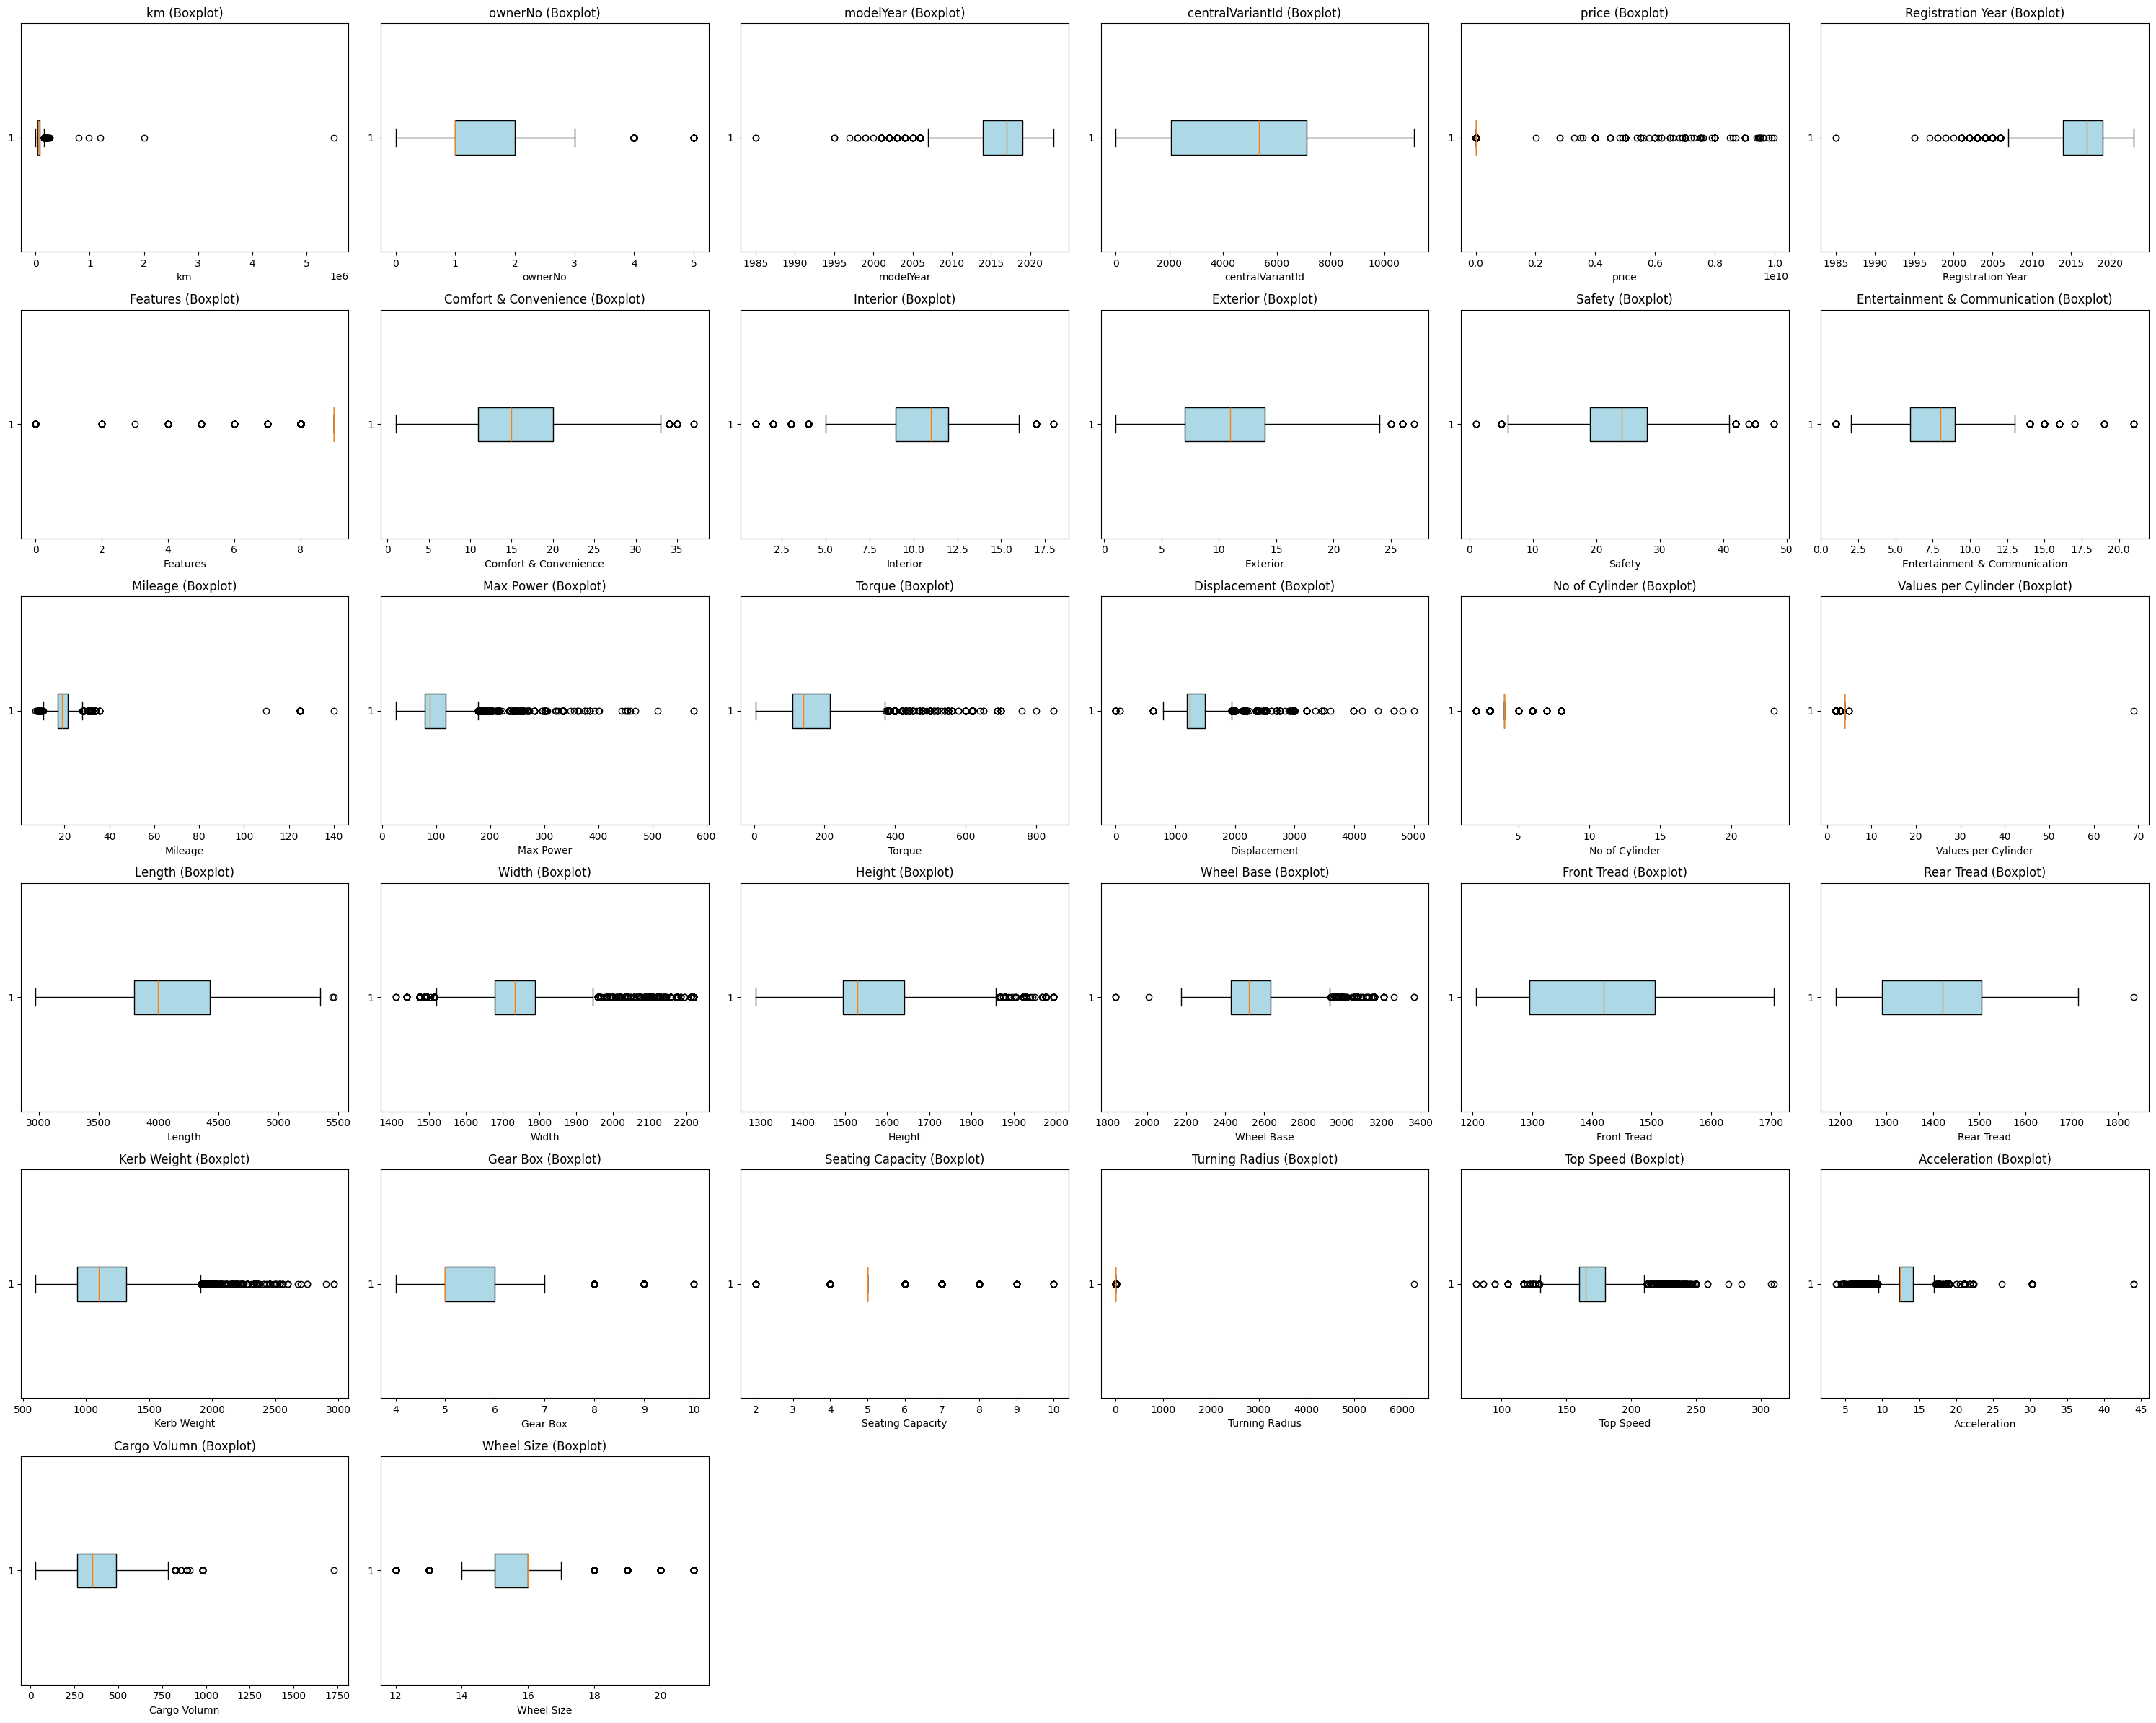

In [213]:
# Function to visualize outliers using boxplots for selected columns
def visualize_outliers_boxplot(df_CombinedData, columns, num_cols=6):
    num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate number of rows for subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        ax = axes[i]
        ax.boxplot(df_CombinedData[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        ax.set_title(f"{col} (Boxplot)")
        ax.set_xlabel(col)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Remove unused axes

    plt.tight_layout()
    plt.show()

# Visualize outliers using boxplots for a sample of numerical columns (limit for visualization)
visualize_outliers_boxplot(df_CombinedData, numerical_columns)


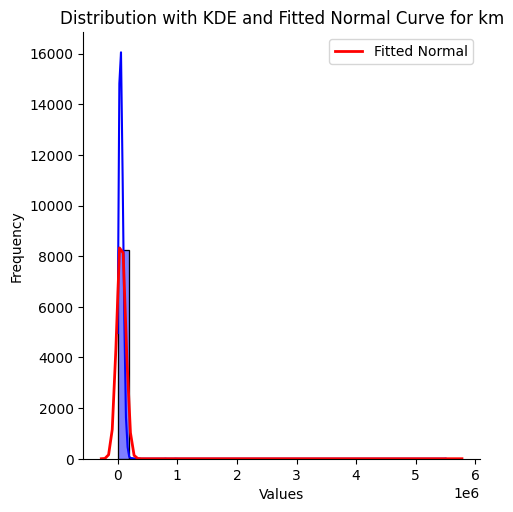

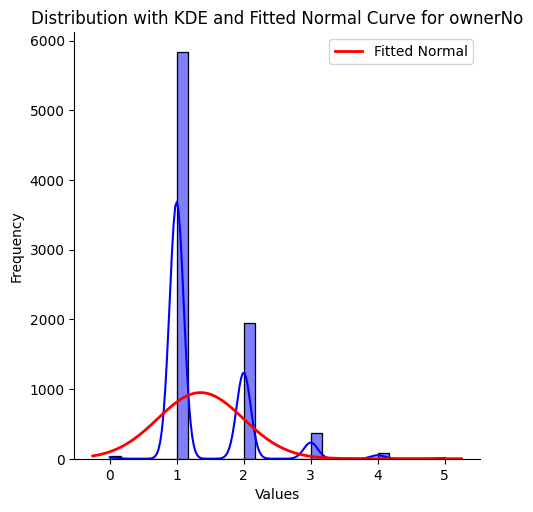

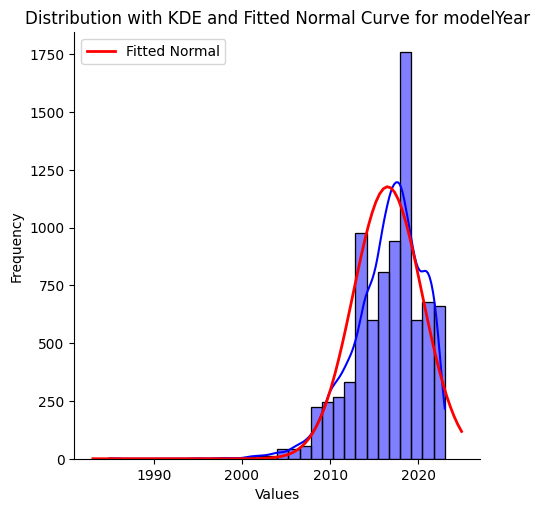

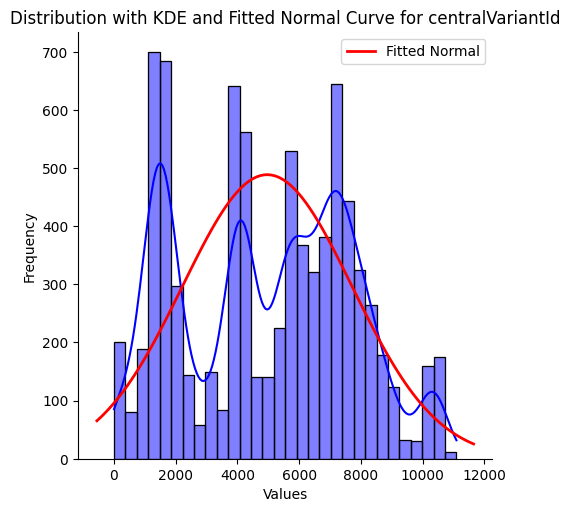

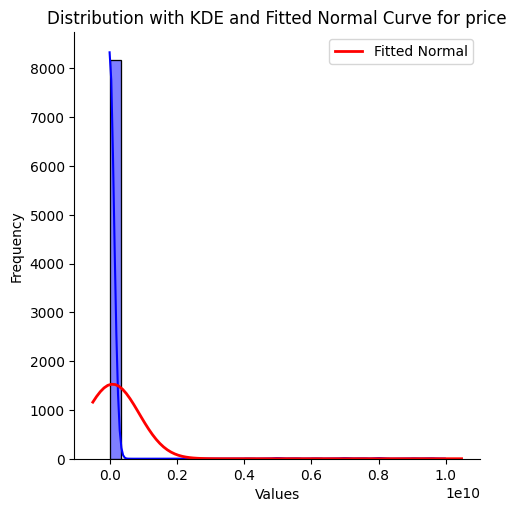

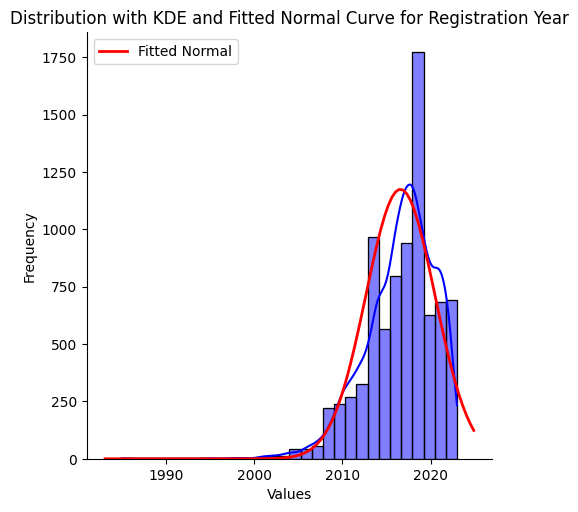

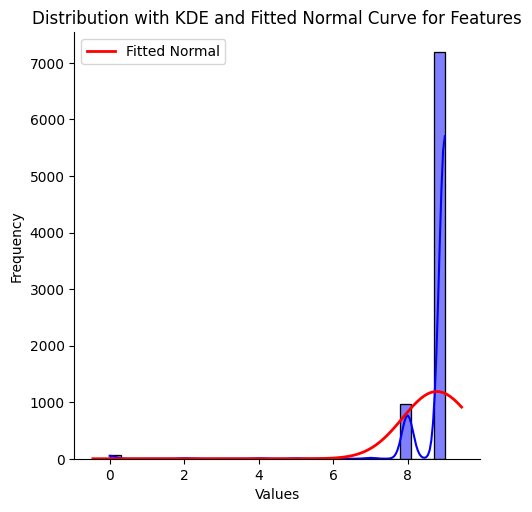

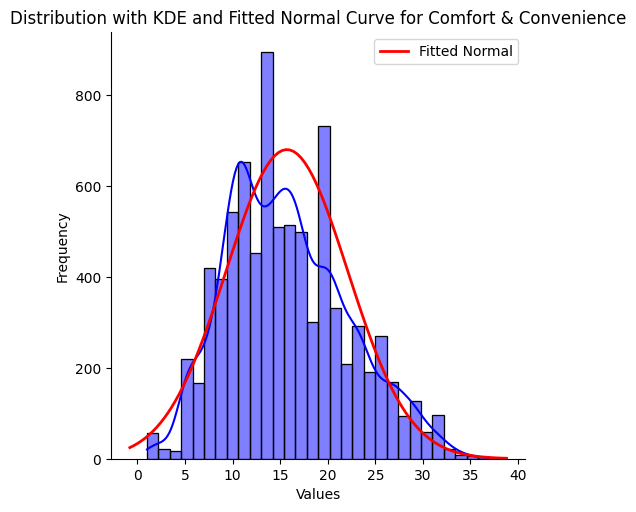

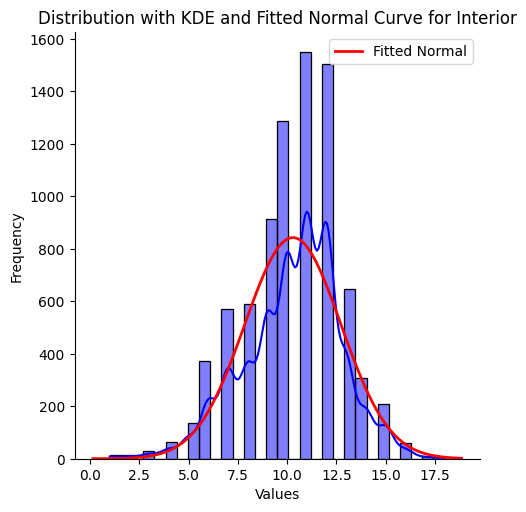

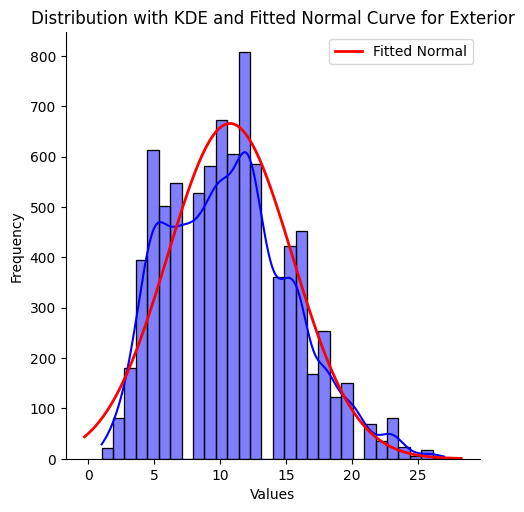

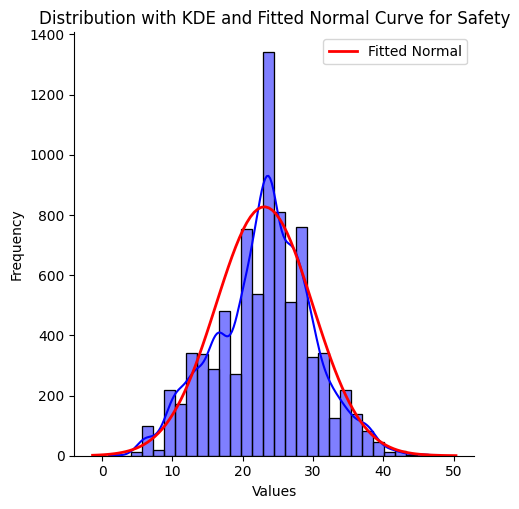

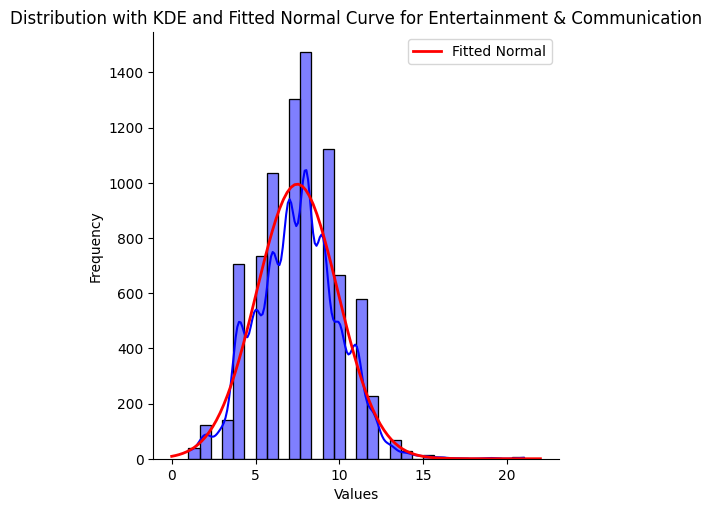

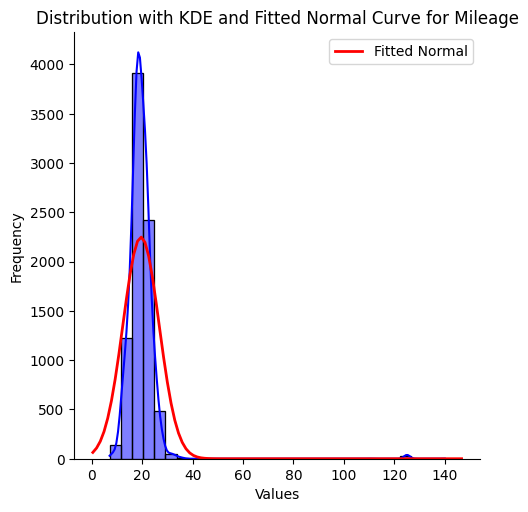

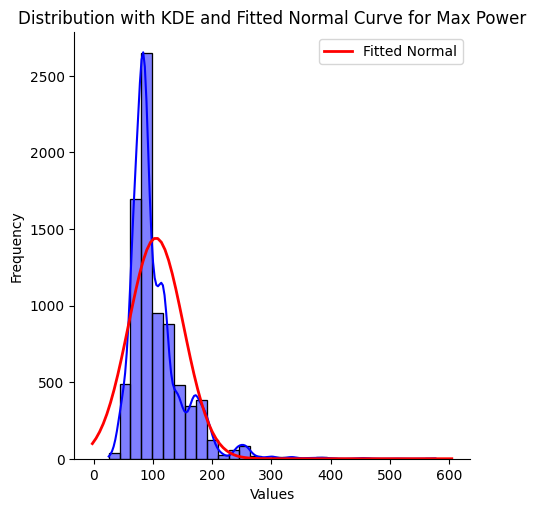

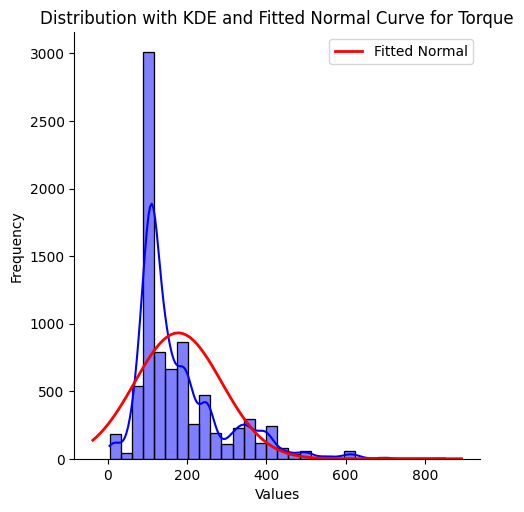

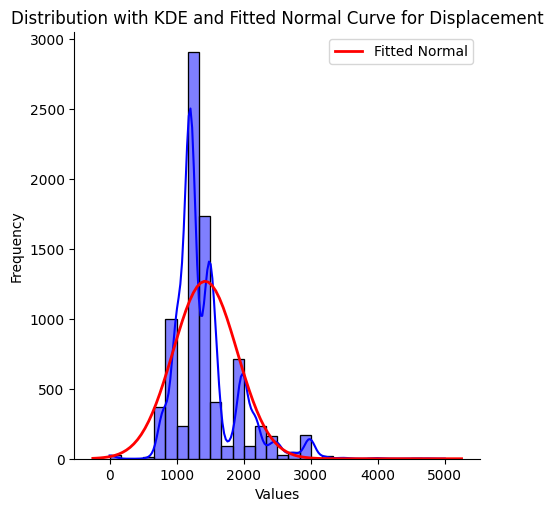

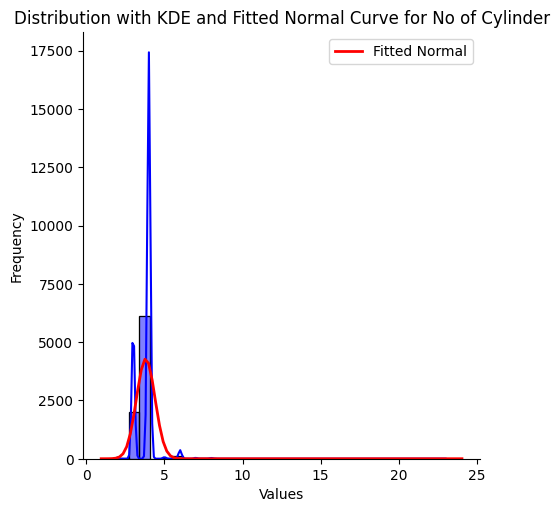

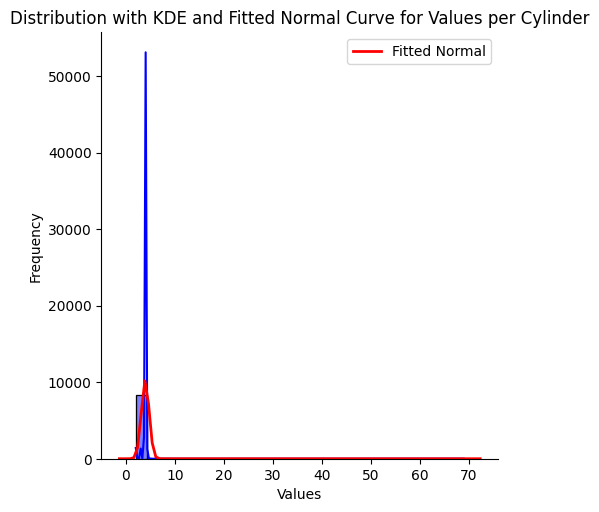

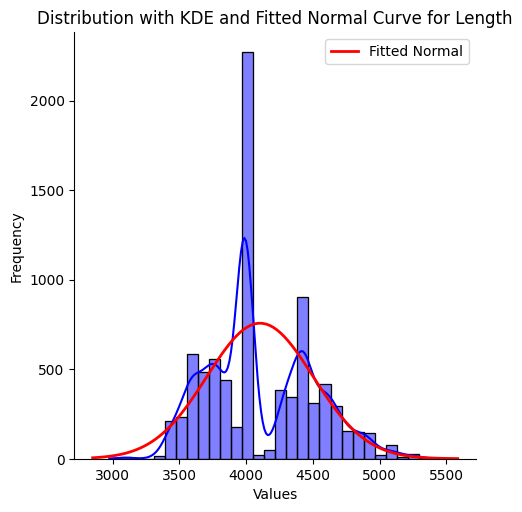

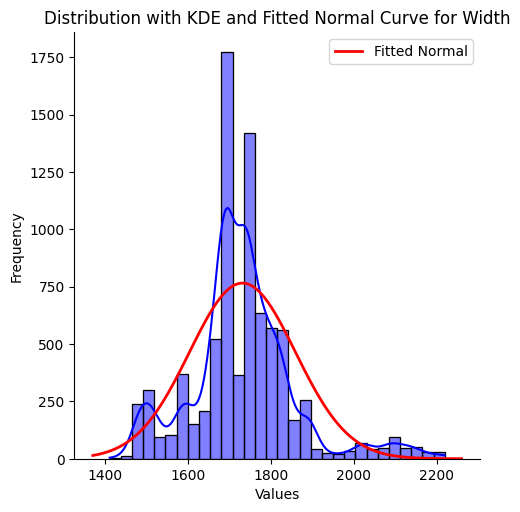

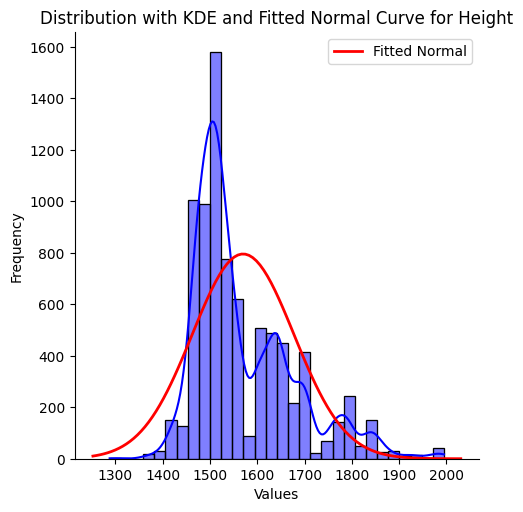

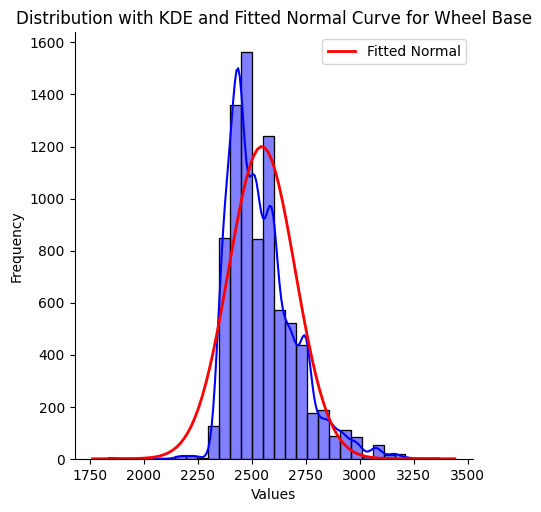

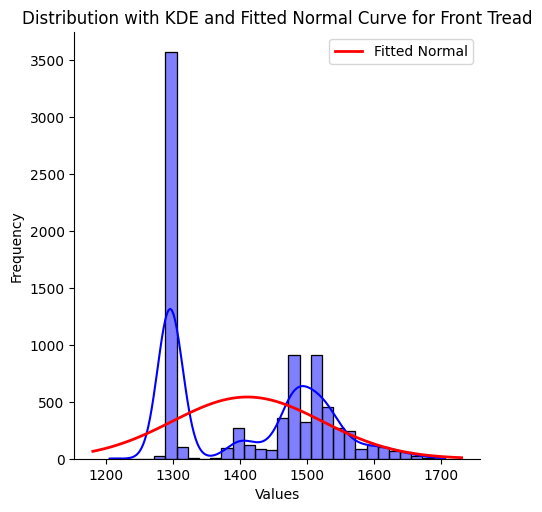

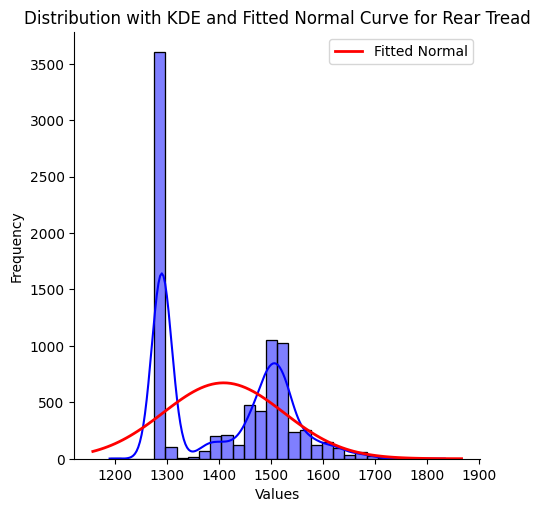

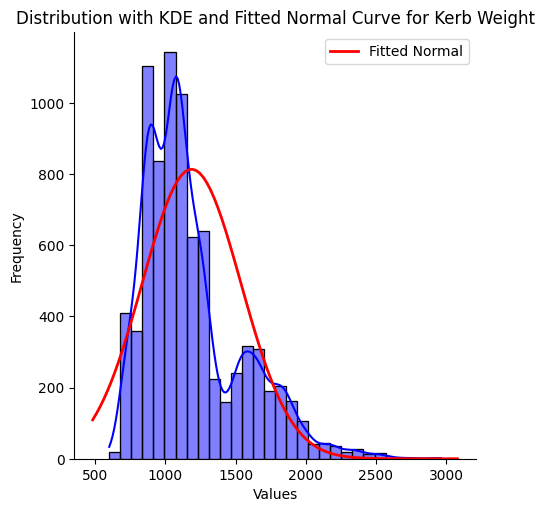

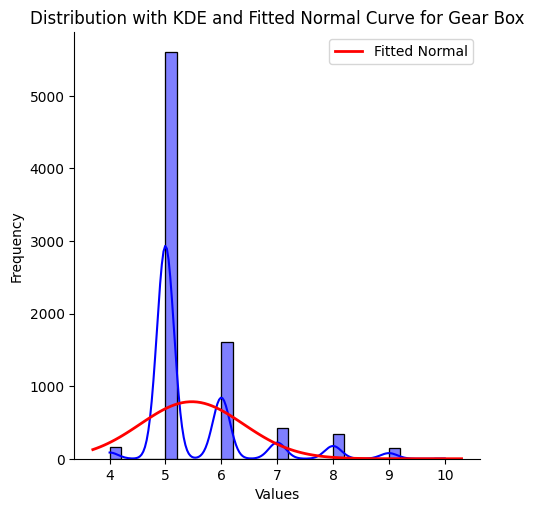

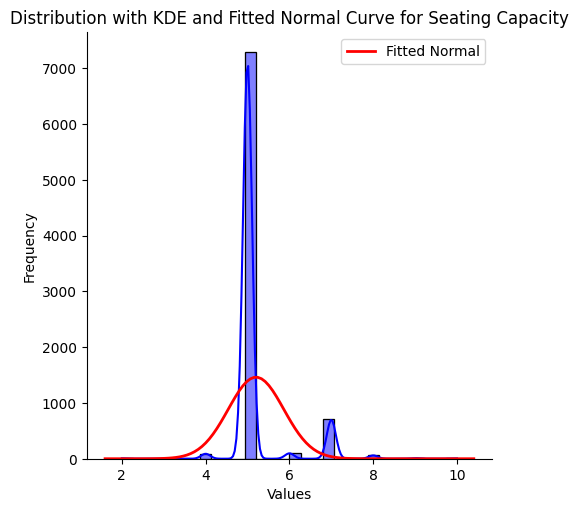

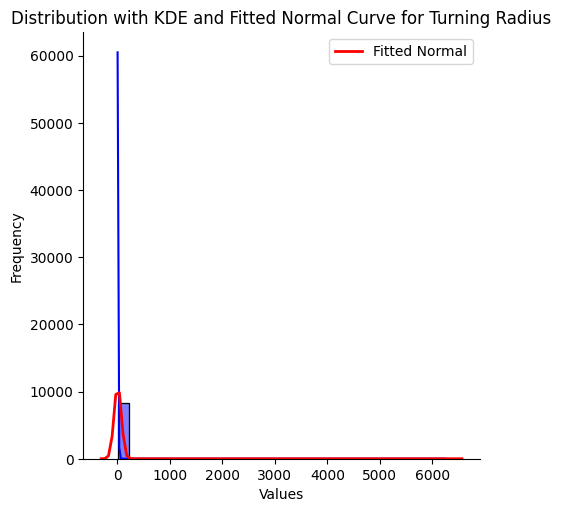

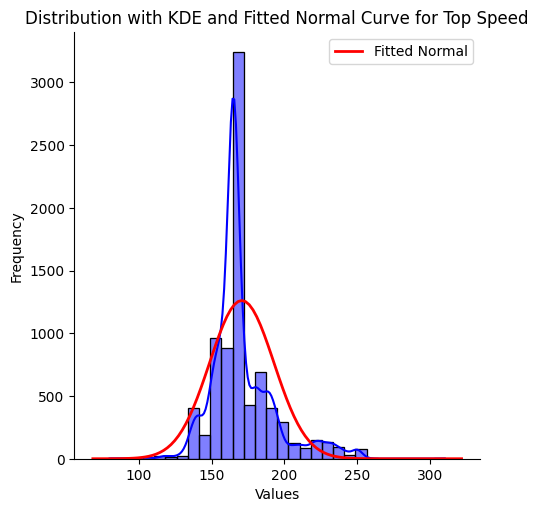

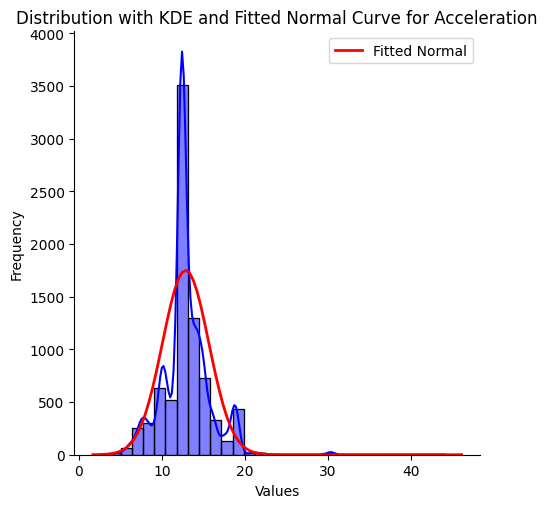

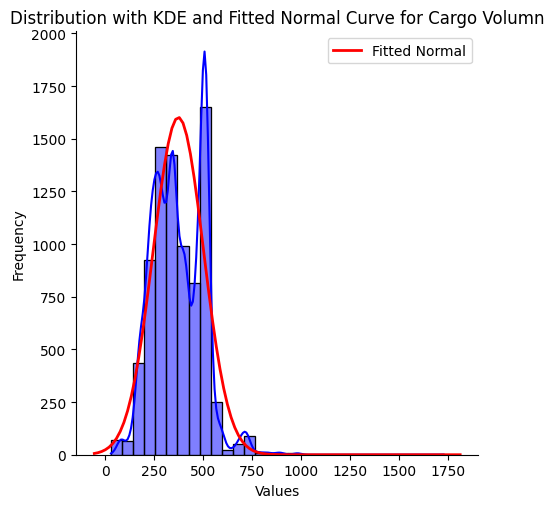

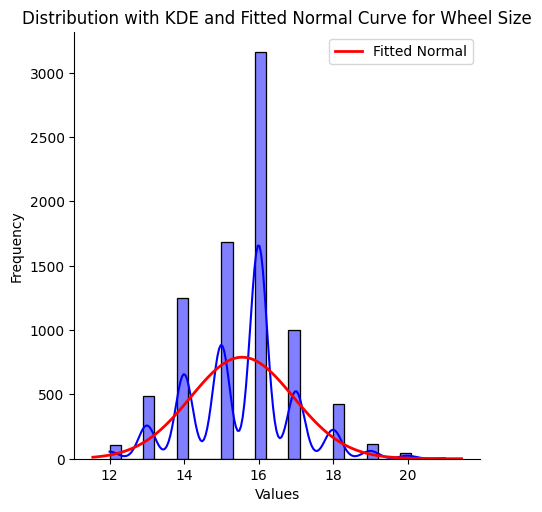

In [215]:
for col in numerical_columns:

    # Create a displot with KDE for the column data
    sns.displot(df_CombinedData[col], kde=True, bins=30, color='blue')

    # Fit a normal distribution to the column data
    mu, sigma = norm.fit(df_CombinedData[col])  # Calculate mean (mu) and standard deviation (sigma)

    # Generate x values for the fitted normal curve
    xmin, xmax = plt.xlim()  # Get the x-axis limits
    x = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(x, mu, sigma)  # Generate the PDF

    # Overlay the fitted normal distribution curve on the plot
    plt.plot(x, pdf * len(df_CombinedData[col]) * (xmax - xmin) / 30, color='red', lw=2, label='Fitted Normal')
    plt.title(f'Distribution with KDE and Fitted Normal Curve for {col}')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()



# Handling the Outliers Using Log Transformation

In [221]:
for column in numerical_columns:
    print(f'Skewness of the {column} : ',df_CombinedData[column].skew())
    print(f'Kurtosis of the {column} : ',df_CombinedData[column].kurtosis())
    print("-----------------------------------------")

Skewness of the km :  50.321846620695695
Kurtosis of the km :  3528.5159643433653
-----------------------------------------
Skewness of the ownerNo :  1.8896380317702939
Kurtosis of the ownerNo :  4.3030634157761645
-----------------------------------------
Skewness of the modelYear :  -0.9168425723023568
Kurtosis of the modelYear :  1.8210528547893352
-----------------------------------------
Skewness of the centralVariantId :  0.005339401378901462
Kurtosis of the centralVariantId :  -1.0402420942405324
-----------------------------------------
Skewness of the price :  9.465673573923993
Kurtosis of the price :  91.83018959055562
-----------------------------------------
Skewness of the Registration Year :  -0.9301145789797911
Kurtosis of the Registration Year :  1.83748649532592
-----------------------------------------
Skewness of the Features :  -7.807182648505845
Kurtosis of the Features :  68.61548536342829
-----------------------------------------
Skewness of the Comfort & Conven

In [ ]:
# for i in numerical_columns:
#   if df_1[i].skew() < 0.5 and df_1[i].skew() > -0.5 and df_1[i].kurtosis() < 3 and df_1[i].kurtosis() > -3:
#     continue
#   print(i)
#   method = [0,0.5,-0.5,-1,1,2,-2]
#   for j in method:
#     print(j)
#     print("skewness",pd.DataFrame(boxcox(df_1[i],lmbda=j)).skew().values,"Kurtosis",pd.DataFrame(boxcox(df_1[i],lmbda=j)).kurtosis().values)
#   print("---------------------------------")